In [1088]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

In [1089]:
water = pd.read_excel('../data/preprocessed/water.xlsx', index_col=0)
w_21 = pd.read_excel('../data/rawdata/water/water_2021_06.xlsx')
h_rf = pd.read_excel('../data/refined/health/health.xlsx', index_col=0)
hth = pd.read_excel('../data/preprocessed/health.xlsx', index_col=0)
wh = pd.read_excel('../data/preprocessed/water_health.xlsx', index_col=0)

In [43]:
pd.set_option('display.max_columns', 70)

# 수질 분석할 컬럼 정하기
1) 변화가 적은 컬럼보다 max-min이 큰 컬럼으로 선정하여 그래프 그리기 <br>
2) max-min 값이 비슷한 것끼리 같이 그리기
* 과망간산칼륨소비량: 수중에 존재하는 유기물 등에 의해 소비된 과망간산칼륨의 양을 의미

In [9]:
water.head()

,연도,지역,일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),...,클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",포름알데히드(기준:0.5/ 단위:(mg/L))
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.007183,0.002321,0.000000,0.001205,0.000000,0.009164,0.0,0.0,0.0,0.0
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,...,0.016176,0.000315,0.000000,0.000086,0.000000,0.001610,0.0,0.0,0.0,0.0
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,...,0.014198,0.002030,0.000207,0.000954,0.000062,0.009804,0.0,0.0,0.0,0.0
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,...,0.014614,0.005862,0.000372,0.002220,0.000000,0.024049,0.0,0.0,0.0,0.0
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.011760,0.000930,0.000000,0.002256,0.000077,0.012505,0.0,0.0,0.0,0.0


In [19]:
df = water.iloc[:, 2:]
sr = df.max() - df.min()
sr.sort_values(ascending=False, inplace=True)

In [28]:
sr

증발잔류물(기준:500/ 단위:(mg/L))                  230.867264
경도(기준:300/ 단위:(mg/L))                      87.041557
황산이온(기준:200/ 단위:(mg/L))                    67.977848
염소이온(기준:250/ 단위:(mg/L))                    40.040137
일반세균(기준:100/ 단위:(CFU/mL))                   6.666667
수소이온농도(기준:5.8 ~ 8.5/ 단위:-)                  4.615290
과망간산칼륨소비량(기준:10/ 단위:(mg/L))                 3.050226
질산성질소(기준:10/ 단위:(mg/L))                     1.993741
색도(기준:5/ 단위:(도))                            1.177172
잔류염소(기준:4/ 단위:(mg/L))                       0.872749
불소(기준:1.5/ 단위:(mg/L))                       0.440217
붕소(기준:1/ 단위:(mg/L))                         0.090278
알루미늄(기준:0.2/ 단위:(mg/L))                     0.061972
아연(기준:3/ 단위:(mg/L))                         0.050000
톨루엔(기준:0.7/ 단위:(mg/L))                      0.044579
총트리할로메탄(기준:0.1/ 단위:(mg/L))                  0.041806
할로아세틱에시드(기준:0.1/ 단위:(mg/L))                 0.040115
포름알데히드(기준:0.5/ 단위:(mg/L))                   0.032792
클로로포름(기준:0.08/ 단위:(mg/L))                   0.

In [27]:
# 사용할 컬럼 list로 만들기
[sr.index[7]] + list(sr.index[9:19])

['질산성질소(기준:10/ 단위:(mg/L))',
 '잔류염소(기준:4/ 단위:(mg/L))',
 '불소(기준:1.5/ 단위:(mg/L))',
 '붕소(기준:1/ 단위:(mg/L))',
 '알루미늄(기준:0.2/ 단위:(mg/L))',
 '아연(기준:3/ 단위:(mg/L))',
 '톨루엔(기준:0.7/ 단위:(mg/L))',
 '총트리할로메탄(기준:0.1/ 단위:(mg/L))',
 '할로아세틱에시드(기준:0.1/ 단위:(mg/L))',
 '포름알데히드(기준:0.5/ 단위:(mg/L))',
 '클로로포름(기준:0.08/ 단위:(mg/L))']

# Correlation

In [1049]:
cor = wh.iloc[:, 2:].corr()
cor

,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),카드뮴(기준:0.005),붕소(기준:1),페놀(기준:0.005),다이아지논(기준:0.02),파라티온(기준:0.06),"1,2-디브로모-3-클로로프로판(기준:0.003)",페니트로티온(기준:0.04),카바릴(기준:0.07),"1,1,1-트리클로로에탄(기준:0.1)",테트라클로로에틸렌(기준:0.01),트리클로로에틸렌(기준:0.03),디클로로메탄(기준:0.02),벤젠(기준:0.01),톨루엔(기준:0.7),에틸벤젠(기준:0.3),크실렌(기준:0.5),"1,1-디클로로에틸렌(기준:0.03)",사염화탄소(기준:0.002),경도(기준:300),과망간산칼륨소비량(기준:10),동(기준:1),색도(기준:5),세제(기준:0.5),수소이온농도(기준:5.8 ~ 8.5),아연(기준:3),염소이온(기준:250),증발잔류물(기준:500),철(기준:0.3),망간(기준:0.05),황산이온(기준:200),알루미늄(기준:0.2),총트리할로메탄(기준:0.1),잔류염소(기준:4),클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
일반세균(기준:100),1.000000,0.731231,0.058786,0.003519,-0.005916,NaN,-0.008812,0.007398,0.129937,0.008164,0.002480,-0.030667,-0.009813,-0.009304,-0.011618,0.031516,-0.008977,-0.015575,0.073288,-0.004141,-0.021095,0.195686,-0.006026,0.105592,0.034710,0.011379,0.012367,-0.010631,0.036276,0.099551,0.314704,0.131402,-0.002506,-0.024946,0.376725,-0.016477,-0.030729,0.339507,0.174404,-0.060551,-0.089476,-0.153556,-0.269693,-0.165508,-0.071032,0.093144,-0.034456,-0.046839,-0.090844,-0.092838,-0.022147,-0.035964,-0.013906,-0.196372,0.026594,-0.004459,0.013860,0.011585,0.137413
납(기준:0.01),0.731231,1.000000,0.101865,-0.026561,-0.031009,NaN,-0.010461,0.032875,0.025721,0.022266,-0.014984,-0.048668,-0.016045,-0.012117,-0.015420,-0.032040,-0.012117,-0.025196,-0.026751,-0.035562,-0.030576,0.162551,-0.027582,-0.021136,-0.040288,-0.029293,-0.026712,-0.027236,0.051218,0.147205,0.241130,0.203048,-0.014259,-0.044887,0.353114,-0.007248,-0.020168,0.235224,0.166772,-0.080446,-0.084570,-0.169132,-0.270415,-0.179876,-0.048845,0.096409,-0.015904,-0.047255,-0.084631,-0.099403,0.036050,-0.048058,0.005258,-0.231496,-0.042324,0.037689,0.080771,0.007554,0.122314
불소(기준:1.5),0.058786,0.101865,1.000000,0.010381,-0.046251,NaN,0.021502,-0.043009,0.043966,0.057376,-0.036050,0.480180,-0.058433,0.123340,0.044423,0.017353,0.053414,0.106962,0.041673,0.441729,0.614816,0.080647,-0.011657,-0.047893,0.015883,0.073691,-0.011496,0.327651,0.340746,0.126808,0.168403,0.022534,-0.037706,-0.058598,0.285226,0.476323,0.490388,0.159968,0.177461,0.417669,-0.074223,0.327846,-0.003381,0.152679,-0.080730,0.238616,-0.119368,0.292520,-0.025148,0.210089,0.405762,0.232935,0.058673,0.073334,-0.156233,-0.247057,-0.250123,0.236236,0.085950
비소(기준:0.01),0.003519,-0.026561,0.010381,1.000000,0.042030,NaN,0.216100,0.408681,0.165657,0.019118,0.099944,-0.067886,-0.033767,0.007802,0.206088,-0.010243,0.210913,0.092295,0.116469,0.106351,-0.006468,0.392736,0.308714,0.081963,0.247141,0.169689,0.044854,0.063109,0.080921,0.052184,0.119326,0.073309,0.013095,-0.008328,0.130057,-0.055882,-0.032113,0.122103,0.081316,-0.061438,0.215896,-0.040102,0.121133,0.002984,0.079029,0.104673,0.009840,0.120941,0.014849,-0.078555,-0.064971,-0.031353,-0.041089,-0.062494,0.117550,-0.060067,0.059372,0.035712,-0.001463
셀레늄(기준:0.01),-0.005916,-0.031009,-0.046251,0.042030,1.000000,NaN,-0.015903,0.123011,0.150189,-0.032049,0.021122,-0.044205,0.010900,-0.003678,0.031347,-0.002305,-0.016982,0.098904,0.041803,0.016620,-0.046221,0.113081,0.051479,0.148878,0.131219,0.028247,0.002764,0.008489,-0.005232,0.127349,0.136530,-0.033153,-0.000035,0.002959,0.076461,-0.125644,-0.050763,0.019407,0.124567,-0.060694,0.167562,0.001139,0.163882,0.040851,0.233633,0.133520,0.072010,0.006914,0.116771,-0.119356,-0.069763,-0.092357,-0.026135,0.029841,0.077613,-0.060631,0.110406,0.144806,-0.053469
수은(기준:0.001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시안(기준:0.01),-0.008812,-0.010461,0.021502,0.216100,-0.015903,NaN,1.000000,-0.001444,-0.01

In [1051]:
# 각 건강관련요인 컬럼에서 가장 큰 상관관계지수
for i in range(-6, 0):
    sr = cor.iloc[:-6, i]
    sr = abs(sr[~(sr == 1)]).sort_values(ascending=False)
    max_idx = sr.idxmax()
    max_cor = sr[0]
    print(cor.columns[i], ': ', max_idx, max_cor)

삶의질지수 :  질산성질소(기준:10) 0.27144793287297897
양호한주관적건강수준인지율 :  증발잔류물(기준:500) 0.3481050266482788
스트레스인지율 :  디브로모클로로메탄(기준:0.1) 0.4300682710271766
우울감경험률 :  알루미늄(기준:0.2) 0.44288464260129373
주관적구강건강이나쁜인구의분율 :  불소(기준:1.5) 0.23623630972795404
연간보건기관이용률 :  동(기준:1) 0.30896275886471775


In [111]:
# 스트레스 인지율, 우울감 경험률
for i in range(-4, -2):
    sr = cor.iloc[:-6, i]
    sr = abs(sr[~(sr == 1)]).sort_values(ascending=False)
    display(cor.columns[i], sr)

'스트레스인지율'

디브로모클로로메탄(기준:0.1)              0.430068
알루미늄(기준:0.2)                   0.347615
디브로모아세토니트릴(기준:0.1)             0.326778
브로모디클로로메탄(기준:0.03)             0.314072
질산성질소(기준:10)                   0.293494
총트리할로메탄(기준:0.1)                0.286188
황산이온(기준:200)                   0.279639
망간(기준:0.05)                    0.272785
불소(기준:1.5)                     0.247057
암모니아성질소(기준:0.5)                0.237513
증발잔류물(기준:500)                  0.232905
붕소(기준:1)                       0.232230
색도(기준:5)                       0.221664
수소이온농도(기준:5.8 ~ 8.5)           0.189110
다이아지논(기준:0.02)                 0.188199
염소이온(기준:250)                   0.180770
톨루엔(기준:0.7)                    0.179668
트리클로로에틸렌(기준:0.03)              0.178503
크롬(기준:0.05)                    0.159292
동(기준:1)                        0.158863
1,1,1-트리클로로에탄(기준:0.1)          0.151675
과망간산칼륨소비량(기준:10)               0.149601
디클로로메탄(기준:0.02)                0.126034
1,4-다이옥산(기준:0.05)              0.125717
클로로포름(기준:0.08)                 0.116988


'우울감경험률'

알루미늄(기준:0.2)                   0.442885
디브로모클로로메탄(기준:0.1)              0.381836
브로모디클로로메탄(기준:0.03)             0.373367
총트리할로메탄(기준:0.1)                0.251544
불소(기준:1.5)                     0.250123
암모니아성질소(기준:0.5)                0.227852
톨루엔(기준:0.7)                    0.214646
붕소(기준:1)                       0.195890
질산성질소(기준:10)                   0.178900
트리클로로에틸렌(기준:0.03)              0.175355
디브로모아세토니트릴(기준:0.1)             0.156218
1,4-다이옥산(기준:0.05)              0.153376
황산이온(기준:200)                   0.144729
파라티온(기준:0.06)                  0.134413
1,1,1-트리클로로에탄(기준:0.1)          0.134348
과망간산칼륨소비량(기준:10)               0.132755
클로로포름(기준:0.08)                 0.132256
세제(기준:0.5)                     0.126522
시안(기준:0.01)                    0.114297
카바릴(기준:0.07)                   0.113536
셀레늄(기준:0.01)                   0.110406
1,2-디브로모-3-클로로프로판(기준:0.003)    0.106873
페니트로티온(기준:0.04)                0.103043
잔류염소(기준:4)                     0.101877
망간(기준:0.05)                    0.101599


## Correlation Visualisation by Heatmap

In [114]:
# 히트맵 그릴 부분 dataframe
h_map = abs(cor.iloc[-6:, :-6])    # 상관계수 절대값 처리
h_map

,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),...,클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5)
삶의질지수,0.196372,0.231496,0.073334,0.062494,0.029841,NaN,0.075371,0.005364,0.053088,0.271448,...,0.149087,0.077339,0.010184,0.018162,0.057552,0.139242,0.116276,0.147635,0.047429,0.107600
양호한주관적건강수준인지율,0.026594,0.042324,0.156233,0.117550,0.077613,NaN,0.008348,0.133530,0.264349,0.157688,...,0.125749,0.038494,0.025758,0.061283,0.109266,0.125681,0.267194,0.218998,0.220434,0.084801
스트레스인지율,0.004459,0.037689,0.247057,0.060067,0.060631,NaN,0.095685,0.159292,0.237513,0.293494,...,0.116988,0.059236,0.326778,0.046120,0.062953,0.100205,0.314072,0.430068,0.125717,0.092929
우울감경험률,0.013860,0.080771,0.250123,0.059372,0.110406,NaN,0.114297,0.097419,0.227852,0.178900,...,0.132256,0.063676,0.156218,0.002065,0.021919,0.018600,0.373367,0.381836,0.153376,0.061089
주관적구강건강이나쁜인구의분율,0.011585,0.007554,0.236236,0.035712,0.144806,NaN,0.057941,0.096521,0.081973,0.115837,...,0.124643,0.056629,0.076785,0.101854,0.071816,0.179027,0.203190,0.051305,0.019607,0.023648
연간보건기관이용률,0.137413,0.122314,0.085950,0.001463,0.053469,NaN,0.045293,0.090911,0.259913,0.002298,...,0.099704,0.047460,0.237454,0.127357,0.179079,0.145381,0.256526,0.238984,0.085586,0.130599


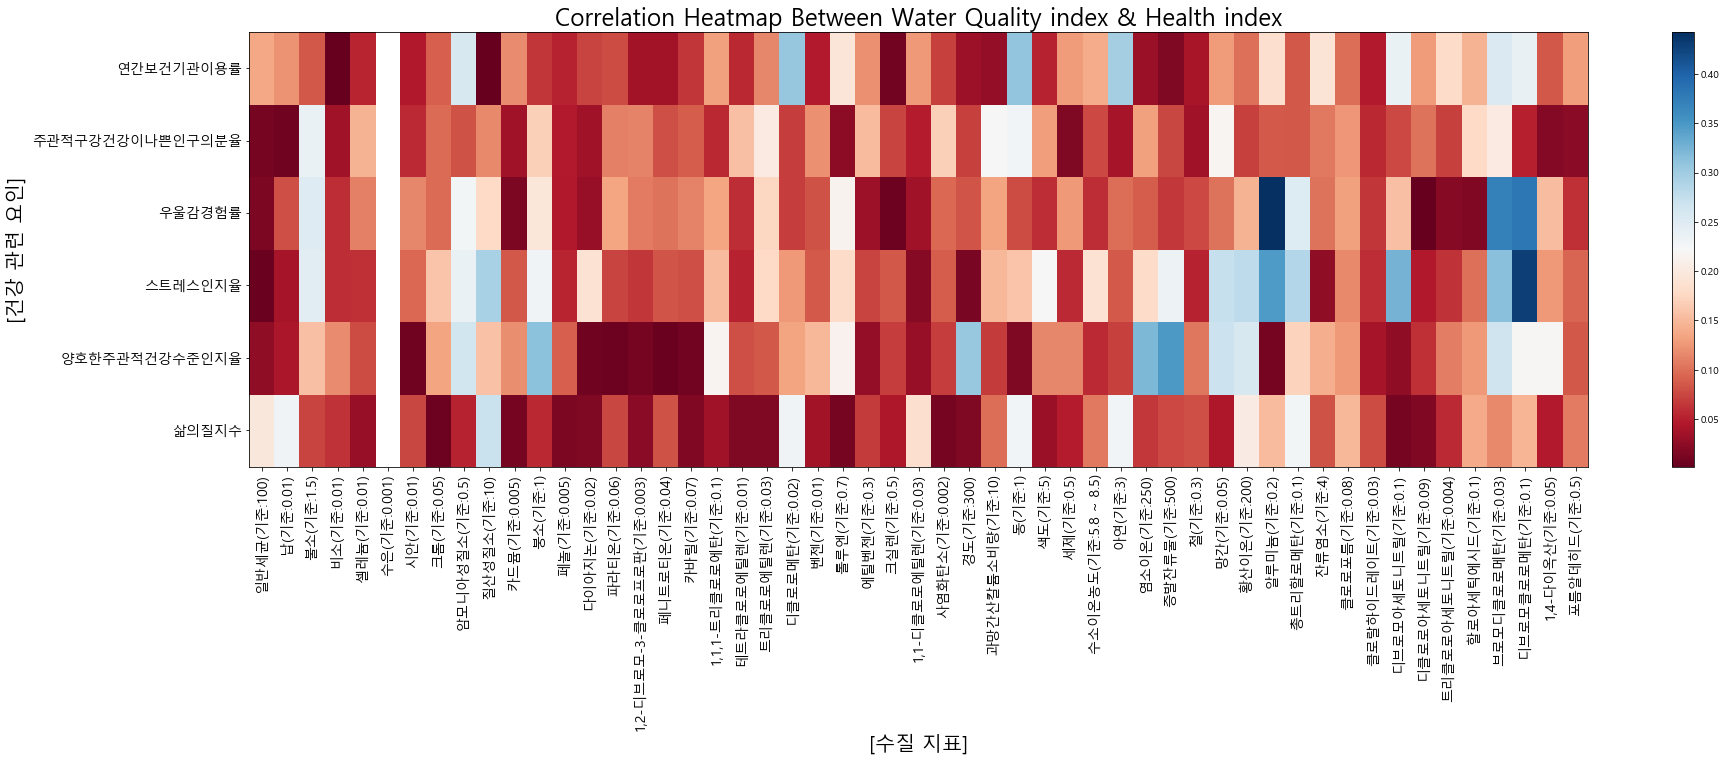

In [115]:
plt.figure(figsize=(30, 8))
plt.rc('font', family='Malgun Gothic')  

plt.pcolor(h_map, cmap='RdBu')  

plt.xticks(np.arange(h_map.shape[1]) + 0.5, labels=h_map.columns, rotation=90, fontsize=14)    # 길어서 겹치므로 회전시킴
plt.yticks(np.arange(h_map.shape[0]) + 0.5, labels=h_map.index, fontsize=14)

plt.title('Correlation Heatmap Between Water Quality index & Health index', fontsize=24)
plt.xlabel('[수질 지표]', fontsize=20)
plt.ylabel('[건강 관련 요인]', fontsize=20) 

plt.colorbar()
plt.show()

> 절대값 처리하지 않은 상관계수는 가장 큰 값(-0.5, 0.5)이 Red, Blue로 나뉘어서 가독성이 떨어짐

### 상관계수의 유효성을 p-value를 통해 확인

In [407]:
from scipy import stats

In [410]:
stats.pearsonr(wh['디브로모클로로메탄(기준:0.1)'], wh['스트레스인지율'])   

(-0.43006827102717626, 2.8419207295078284e-10)

In [1052]:
stats.pearsonr(wh['알루미늄(기준:0.2)'], wh['스트레스인지율'])   

(0.3476151150854194, 5.588342679285881e-07)

In [1053]:
stats.pearsonr(wh['디브로모아세토니트릴(기준:0.1)'], wh['스트레스인지율'])   

(-0.3267779287936061, 2.7769204962058195e-06)

In [413]:
stats.pearsonr(wh['알루미늄(기준:0.2)'], wh['우울감경험률'])

(0.44288464260129384, 7.181187199934357e-11)

In [517]:
stats.pearsonr(wh['디브로모클로로메탄(기준:0.1)'], wh['우울감경험률'])

(-0.3818364793689878, 3.086812276323599e-08)

In [1054]:
stats.pearsonr(wh['브로모디클로로메탄(기준:0.03)'], wh['우울감경험률'])

(-0.37336734763953483, 6.524030636953506e-08)

> 둘다 p-value가 매우 작아 값은 유효함

## Linear Regression

In [116]:
wh.head()

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),...,브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.966,51.0,30.6,8.1,29.7,0.0
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.964,48.3,29.8,6.8,35.0,0.0
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.963,46.4,30.1,7.2,37.7,0.0
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.962,49.8,27.3,8.8,35.1,0.0
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.951,48.4,26.8,8.7,35.4,0.0


### Combination 1

In [1078]:
x = wh[['질산성질소(기준:10)', '망간(기준:0.05)', '황산이온(기준:200)', '알루미늄(기준:0.2)', '총트리할로메탄(기준:0.1)', 
        '디브로모아세토니트릴(기준:0.1)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
y = wh['스트레스인지율']

In [1057]:
# Train & Test data
from sklearn.model_selection import train_test_split

In [1079]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
x_train.shape, y_test.shape

((137, 8), (60,))

In [1059]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [1080]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [1061]:
from sklearn.linear_model import LinearRegression

In [1081]:
lr = LinearRegression()
lr.fit(x_scaled, y_train)

LinearRegression()

In [1082]:
x_test_sc = scaler.transform(x_test)
lr.score(x_test_sc, y_test)

0.31285010289470516

In [1077]:
# MSE도 구해서 확인해보기
from sklearn.metrics import mean_squared_error as mse

In [1083]:
mse(y_test, lr.predict(x_test_sc))

5.583520473916497

In [1064]:
# Pipeline으로 계산한 값과 비교
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.31285010289470516

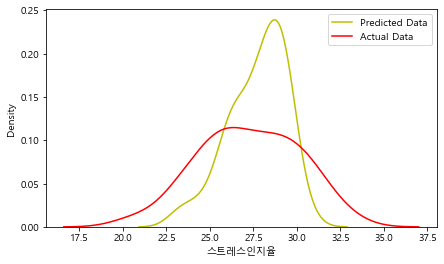

In [1069]:
fig = plt.figure(figsize=(7, 4))

ax1 = sns.kdeplot(lr.predict(x_test_sc), color='y', label='Predicted Data')
ax2 = sns.kdeplot(y_test, color='r', label='Actual Data', ax=ax1)
plt.legend()

#### Polynomial Regression with Multiple Demension

In [1076]:
from sklearn.preprocessing import PolynomialFeatures

In [1075]:
pipe = Pipeline([('scaler', StandardScaler()), ('pf', PolynomialFeatures(degree=2, include_bias=False)), ('lr', LinearRegression())])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

-0.2788179775152928

In [1084]:
mse(y_test, pipe.predict(x_test))

10.39119177627554

> R값은 0이하로 줄고 MSE값은 증가하였기 때문에 Polynomial Regression이 더 부정확하다고 할 수 있음

### Combination 2

In [1090]:
x2 = wh[['알루미늄(기준:0.2)', '디브로모아세토니트릴(기준:0.1)', '디브로모클로로메탄(기준:0.1)']]
y2 = wh['스트레스인지율']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=5)
x2_train.shape, y2_test.shape

scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2_train)

lr = LinearRegression()
lr.fit(x2_scaled, y2_train)

x2_test_sc = scaler.transform(x2_test)
lr.score(x2_test_sc, y2_test)

0.2530045566168385

In [1091]:
mse(y2_test, lr.predict(x2_test_sc))

6.069802774652959

### Combination 3

In [661]:
x3 = wh[['알루미늄(기준:0.2)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
y3 = wh['우울감경험률']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=5)
x3_train.shape, y3_test.shape

scaler = StandardScaler()
x3_scaled = scaler.fit_transform(x3_train)

lr = LinearRegression()
lr.fit(x3_scaled, y3_train)

x3_test_sc = scaler.transform(x3_test)
lr.score(x3_test_sc, y3_test)

0.2484828674524442

In [1092]:
mse(y3_test, lr.predict(x3_test_sc))

494.0744870875024

### Combination 4

In [1094]:
x4 = wh[['알루미늄(기준:0.2)', '디브로모클로로메탄(기준:0.1)']]
y4 = wh['우울감경험률']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=5)

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(x4_train, y4_train)
pipe.score(x4_test, y4_test)

0.24143379793669162

In [1095]:
mse(y4_test, pipe.predict(x4_test))

1.408933471043981

### Combination 5

In [1097]:
x5 = wh[['암모니아성질소(기준:0.5)', '붕소(기준:1)', '경도(기준:300)', '염소이온(기준:250)', '증발잔류물(기준:500)', '브로모디클로로메탄(기준:0.03)']]
y5 = wh['양호한주관적건강수준인지율']

x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.3, random_state=5)

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(x5_train, y5_train)
pipe.score(x5_test, y5_test)

0.05043450313051123

In [1098]:
mse(y5_test, pipe.predict(x5_test))

14.643080715580503

### Combination 6

In [1099]:
x6 = wh[['암모니아성질소(기준:0.5)', '디클로로메탄(기준:0.02)', '동(기준:1)', '아연(기준:3)', '브로모디클로로메탄(기준:0.03)']]
y6 = wh['연간보건기관이용률']

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.3, random_state=5)
x6_train.shape, y6_test.shape

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(x6_train, y6_train)
pipe.score(x6_test, y6_test)

0.2737256689358567

In [1100]:
mse(y6_test, pipe.predict(x6_test))

65.17481747648839

#### Polynomial Regression with Multiple Demension

In [1101]:
# Polynomial Regression
pipe = Pipeline([('scaler', StandardScaler()), ('pf', PolynomialFeatures(degree=2, include_bias=False)), ('lr', LinearRegression())])
pipe.fit(x6_train, y6_train)
pipe.score(x6_test, y6_test)

-2.6265855034668615

In [1102]:
mse(y6_test, pipe.predict(x6_test))

325.444584975228

> 생각보다 크게 상관관계 없음

# Health Index on KaKao Map
* Website: Time Genie https://kor.timegenie.com/latitude_longitude/country/kr
* 전라북도의 위도, 경도는 전주로 대신한다

## Web Scraping for Latitude & Longitude

In [139]:
import requests
from bs4 import BeautifulSoup

In [146]:
req = requests.get('https://kor.timegenie.com/latitude_longitude/country/kr')
soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <title>
   위도 경도 :: 대한민국 :: Time Genie
  </title>
  <meta charset="utf-8"/>
  <link href="https://kor.timegenie.com/latitude_longitude/country/kr" rel="canonical"/>
  <link href="https://kor.timegenie.com/amp/latitude_longitude/country/kr" rel="amphtml">
   <link href="https://kor.timegenie.com/mobi/latitude_longitude/country/kr" media="handheld" rel="alternate"/>
   <meta content="width=device-width,minimum-scale=1,initial-scale=1" name="viewport"/>
   <meta content="ko" http-equiv="content-language"/>
   <style>
    /* RTL */ body.rtl { direction: rtl; } body.rtl span.likeshare { float: left; direction: ltr; } body.rtl div.content { text-align: right; } body.rtl span.time24 { float: left; padding: 0px 0px 0px 10px; } body.rtl .links span { float: left; } body.rtl .links i { float: left; } body.rtl .searchMatch span { float: left; } body.rtl .promo span { float: left; } body.rtl p.indent { margin-right: 50px; direction: ltr; } /* Main */ body

**만들고자 하는 테이블 형태** <br>
[['서울특별시', 38, 127],  <br>
 ['부산광역시', xx, xxx],  <br>
 ...                   ]

In [158]:
# 지역 추출
locs = []

for loc in soup.select('a.links > h5'):
    locs.append(loc.text)
locs = locs[:-2]  # 마지막에 이상한 값도 포함됨
len(locs)

100

In [162]:
# 위도 추출
lats = []
mixed = soup.select('div.links > h5')

for i in range(1, len(mixed), 2):
    lats.append(mixed[i].text)
lats = lats[:-2]
len(lats)

100

In [165]:
# 경도 추출
lngs = []
mixed = soup.select('div.links > span')

for i in range(1, len(mixed), 2):
    lngs.append(mixed[i].text)
len(lngs)

100

In [177]:
# Combine as a dataframe
location = pd.DataFrame({'지역':locs, '위도':lats, '경도':lngs})
location.to_excel('../data/preprocessed/loc.xlsx')
print('저장 완료---------------------------------')

저장 완료---------------------------------


**지역**: ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'] <br>
**위도, 경도 찾을 때**: ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '수원시', '원주시', '청주시', '천안시', '전주시', '광주시', '안동시', '창원시', '제주시']
> 충청남도 수도가 대전광역시로 겹쳐서 천안시로 지정<br>
> 강원도 수도 춘천시는 위도, 경도 정보가 없어서 원주시로 대체

In [227]:
location[location['지역'] == '세종특별자치시']

,지역,위도,경도
22,세종특별자치시,36.48750,127.28167


## Infowindow Content Generation

In [232]:
yr_hth = hth[hth['연도'] == 2016]
yr_hth.set_index('지역', inplace=True)
yr_hth.drop('연도', axis=1, inplace=True)
yr_hth

C:\Users\sori-\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
지역,,,,,,
서울특별시,0.956,46.9,30.1,6.9,26.2,18.4
부산광역시,0.954,43.3,27.0,5.8,31.2,19.9
대구광역시,0.960,42.4,26.6,4.9,26.9,19.7
인천광역시,0.951,44.4,30.5,6.9,31.6,21.0
광주광역시,0.958,45.7,28.7,4.6,31.7,18.3
대전광역시,0.957,51.5,31.5,7.4,23.9,16.9
울산광역시,0.963,43.6,24.9,3.8,29.6,24.9
세종특별자치시,0.958,49.2,25.0,4.9,26.6,26.7
경기도,0.954,44.4,30.3,6.5,29.0,21.0


In [233]:
# 지역(시도)마다 인포윈도우에 띄울 string을 담은 list 만들기
contents = []  

for idx in yr_hth.index:
    sr = yr_hth.loc[idx]
    
    string = '<div style="padding:5px;">'     # Kakao Map에 바로 사용할 수 있는 형식: <div style="padding:5px;">Hello World!<br></div>'
    for s in zip(sr.index, sr.values):
        #print(type(s[0]), type(s[1]))      # str, numpy.float64
        string += s[0] + ': ' + str(s[1]) + '<br>' 
    string += '<div>'
    contents.append(string)
 
contents

['<div style="padding:5px;">삶의질지수: 0.956<br>양호한주관적건강수준인지율: 46.9<br>스트레스인지율: 30.1<br>우울감경험률: 6.9<br>주관적구강건강이나쁜인구의분율: 26.2<br>연간보건기관이용률: 18.4<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.954<br>양호한주관적건강수준인지율: 43.3<br>스트레스인지율: 27.0<br>우울감경험률: 5.8<br>주관적구강건강이나쁜인구의분율: 31.2<br>연간보건기관이용률: 19.9<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.96<br>양호한주관적건강수준인지율: 42.4<br>스트레스인지율: 26.6<br>우울감경험률: 4.9<br>주관적구강건강이나쁜인구의분율: 26.9<br>연간보건기관이용률: 19.7<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.951<br>양호한주관적건강수준인지율: 44.4<br>스트레스인지율: 30.5<br>우울감경험률: 6.9<br>주관적구강건강이나쁜인구의분율: 31.6<br>연간보건기관이용률: 21.0<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.958<br>양호한주관적건강수준인지율: 45.7<br>스트레스인지율: 28.7<br>우울감경험률: 4.6<br>주관적구강건강이나쁜인구의분율: 31.7<br>연간보건기관이용률: 18.3<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.957<br>양호한주관적건강수준인지율: 51.5<br>스트레스인지율: 31.5<br>우울감경험률: 7.4<br>주관적구강건강이나쁜인구의분율: 23.9<br>연간보건기관이용률: 16.9<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.963<br>양호한주관적건강수준인지율: 43.6<br>스트레스인지율: 24.9<br>우울감경험률: 3.8

In [234]:
# 지역 & 인포윈도의 string으로 dataframe 만들기
info = pd.DataFrame({'인포윈도우':contents}, index=yr_hth.index)
info

,인포윈도우
지역,
서울특별시,"<div style=""padding:5px;"">삶의질지수: 0.956<br>양호한주..."
부산광역시,"<div style=""padding:5px;"">삶의질지수: 0.954<br>양호한주..."
대구광역시,"<div style=""padding:5px;"">삶의질지수: 0.96<br>양호한주관..."
인천광역시,"<div style=""padding:5px;"">삶의질지수: 0.951<br>양호한주..."
광주광역시,"<div style=""padding:5px;"">삶의질지수: 0.958<br>양호한주..."
대전광역시,"<div style=""padding:5px;"">삶의질지수: 0.957<br>양호한주..."
울산광역시,"<div style=""padding:5px;"">삶의질지수: 0.963<br>양호한주..."
세종특별자치시,"<div style=""padding:5px;"">삶의질지수: 0.958<br>양호한주..."
경기도,"<div style=""padding:5px;"">삶의질지수: 0.954<br>양호한주..."


In [235]:
info.loc['세종특별자치시', '인포윈도우']

'<div style="padding:5px;">삶의질지수: 0.958<br>양호한주관적건강수준인지율: 49.2<br>스트레스인지율: 25.0<br>우울감경험률: 4.9<br>주관적구강건강이나쁜인구의분율: 26.6<br>연간보건기관이용률: 26.7<br><div>'

# Spider Chart
* Reference: https://www.incheon.go.kr/water/WA030204
* 수돗물의 먹는물로서의 수질지표로 중요하지만, 모두 "적합"이라 배제되었던 항목에 대한 차트 - **잔류염소, 아연, 철, 망간, 탁도** 
* 가장 최신 데이터인 **2021년 6**월 **서울과 다른 지역**을 비교하여 비슷한지 확인하는 것이 목표(raw data 사용해야 함)
* Chart code reference: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals

## Preprocess Raw Data  for Spider Plot

In [1436]:
# 검사월으로 쉽게 indexing할 수 있도록 Time Series로 변환
# w_21['검사월'] = pd.to_datetime(w_121['검사월'])
w_21['검사월'] = w_21['검사월'].astype(str).astype('datetime64')   # 위 아래는 결과가 같음. str -> datetime64
w_21.set_index('검사월', inplace=True)
w_21.index                 # DatetimeIndex, freq가 잘못되었지만 다시 설정할 수가 없다...그런데 딱히 문제는 안됨

DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01',
               ...
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01'],
              dtype='datetime64[ns]', name='검사월', length=2418, freq=None)

In [1437]:
# 수도사업자명 강원도 강릉시, 삼척시 등을 모두 강원도로 만들어서 groupby 할 수 있도록 함
split = w_21['수도사업자'].str.split()
w_21['수도사업자'] = split.str.get(0)
w_21.tail()

,수도사업자,시설명,소재지,수원,시설용량(㎥/일),채수년월일,일반세균(기준:100/ 단위:(CFU/mL)),총대장균군(기준:0/ 단위:MPN),대장균/분원성대장균군(기준:0/ 단위:MPN),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),Uranium(기준:30/ 단위:㎍/L),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
검사월,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-01,수자원공사,평림,NaN,호소수,30000,2021-06-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.9,0,0.00,0.0000,NaN,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,38,1.1,적합,적합,0.0,0,0.0,6.8,0.003,14.3,66,0.0,0.0,0.07,6,0.00,0.021,0.86,0.015,0.0070,0.0,0.0032,0.0,0.009,0.006,0.0,0.0
2021-06-01,수자원공사,학야,NaN,호소수,61900,2021-06-03,0,불검출,불검출,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.9,0,0.03,0.0000,NaN,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,73,4.1,적합,적합,0.0,0,0.0,7.3,0.006,13.6,210,0.0,0.0,0.06,15,0.00,0.032,0.51,0.029,0.0028,0.0,0.0017,0.0,0.045,0.003,0.0,0.0
2021-06-01,수자원공사,화순,NaN,호소수,100000,2021-06-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.5,0,0.00,0.0000,NaN,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,26,1.0,적합,적합,0.0,0,0.0,7.0,0.000,8.9,48,0.0,0.0,0.10,5,0.02,0.009,0.57,0.009,0.0036,0.0,0.0016,0.0,0.009,0.000,0.0,0.0
2021-06-01,수자원공사,황지,강원도 태백시 황지동,호소수,70000,2021-06-08,0,불검출,불검출,0.0,0.0,0.0,0.0,0,0,0.0,0.0,2.4,0,0.01,0.0000,NaN,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,73,1.4,적합,적합,0.0,0,0.0,6.9,0.000,15.6,116,0.0,0.0,0.07,6,0.00,0.022,0.69,0.018,0.0016,0.0,0.0014,0.0,0.018,0.004,0.0,0.0
2021-06-01,수자원공사,화성,경기도 화성시 매송면 천천리,호소수,178000,2021-06-07,0,불검출,불검출,0.0,0.0,0.0,0.0,0,0,0.0,0.0,2.1,0,0.01,0.0005,NaN,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,76,1.6,적합,적합,0.0,0,0.0,7.3,0.000,23.9,140,0.0,0.0,0.07,16,0.04,0.024,0.78,0.017,0.0000,0.0,0.0000,0.0,0.001,0.007,0.0,0.0


In [1438]:
df = w_21['2021-06']
df = df[['수도사업자', '시설용량(㎥/일)', '잔류염소(기준:4/ 단위:(mg/L))', '아연(기준:3/ 단위:(mg/L))', '철(기준:0.3/ 단위:(mg/L))', '망간(기준:0.05/ 단위:(mg/L))', '탁도(기준:0.5/ 단위:(NTU))']]
df.columns = ['지역', '시설용량', '잔류염소', '아연', '철', '망간', '탁도']
df.head()

<ipython-input-1438-7a0bf73da9bc>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = w_21['2021-06']


,지역,시설용량,잔류염소,아연,철,망간,탁도
검사월,,,,,,,
2021-06-01,서울특별시,1000000,0.46,0.00,0.0,0.0,0.06
2021-06-01,서울특별시,400000,0.36,0.01,0.0,0.0,0.06
2021-06-01,서울특별시,500000,0.46,0.00,0.0,0.0,0.06
2021-06-01,서울특별시,700000,0.48,0.00,0.0,0.0,0.07
2021-06-01,서울특별시,1600000,0.55,0.00,0.0,0.0,0.06


In [1439]:
# 각 지역 6월 평균 농도 - 탁도의 경우, 단위 아니라 가중치를 이용한 평균을 구함
sr_list = []
for col in df.columns[2:]:
    sr = df.groupby('지역').apply(lambda x: (x['시설용량'] * x[col]).sum() / x['시설용량'].sum())
    sr_list.append(sr)

df_21 = pd.DataFrame(sr_list, index=['잔류염소', '아연', '철', '망간', '탁도']).T  # Series는 행으로 들어감
df_21.reset_index(inplace=True)

In [1440]:
df_21.head()

,지역,잔류염소,아연,철,망간,탁도
0,강원도,0.602971,0.013246,0.0,0.0000,0.118582
1,경기도,0.837803,0.002220,0.0,0.0000,0.036078
2,경상남도,0.403922,0.002394,0.0,0.0002,0.089143
3,경상북도,0.753382,0.004943,0.0,0.0000,0.049574
4,서울특별시,0.497262,0.000811,0.0,0.0000,0.062901


In [339]:
df_21.shape  # raw data를 찾아보니 6월에는 9개 지역만 있는게 맞음!

(9, 6)

## Spider Plot

In [331]:
from math import pi

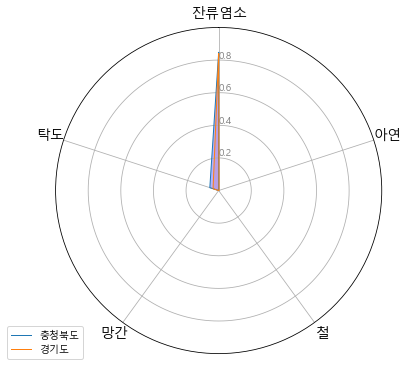

In [459]:
# PART 1: Create background
 
# number of variable
categories = list(df_21)[1:]          # list(dataframe): 컬럼명
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]    # pi = 180도, n/5 * 2pi = 360도에서 n/5 만큼의 각
angles += angles[:1]     # 다시 원점까지 연결된 모양을 그리기 위해서

# Initialise the spider plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)       # 원래 0도가 오른쪽에서 시작하는 것을 왼쪽으로 90도 돌림
ax.set_theta_direction(-1)        # -1: 각도 증가 시계방향, 1: 반시계방향

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, fontsize=14)
 
# Draw ylabels
ax.set_rlabel_position(0)         # tick label이 적히는 각도 
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=10)
plt.ylim(0, 1)


# PART 2: Add plots----------------------------------------------------------------------------------------------
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1 - 서울특별시
values = df_21.loc[8].drop('지역').values.flatten().tolist()   # flatten: 1차원으로 만듦(여기서는 하나 안하나 같은 결과)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="충청북도")
ax.fill(angles, values, 'b', alpha=0.3)
 
# # Ind2 - 경기도
values = df_21.loc[1].drop('지역').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="경기도")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))    # bbox 안에서 upper right\

# Save figure
plt.savefig('../static/assets/images/gg_cb.png')
plt.show()

In [1447]:
df_21

,지역,잔류염소,아연,철,망간,탁도
0,강원도,0.602971,0.013246,0.000000,0.000000,0.118582
1,경기도,0.837803,0.002220,0.000000,0.000000,0.036078
2,경상남도,0.403922,0.002394,0.000000,0.000200,0.089143
3,경상북도,0.753382,0.004943,0.000000,0.000000,0.049574
4,서울특별시,0.497262,0.000811,0.000000,0.000000,0.062901
5,수자원공사,0.804027,0.000677,0.000000,0.000000,0.055068
6,전라남도,0.417196,0.007261,0.000187,0.002302,0.065578
7,충청남도,0.846479,0.000254,0.000000,0.000000,0.084718
8,충청북도,0.846659,0.000187,0.000445,0.000000,0.056993


# Comparison with the Standard limit

## Underground Water Analysis
지하수 원수 수질 검사 항목 중 검출량이 있는 **질산성 질소**의 농도를 기준치와 비교
* Seaborn을 통해 Barchart를 그리게 되면 자동으로 지역을 그룹화하여 물질 농도를 평균 구할 수 있음
* 지하수의 경우 시설용량(가중치)이 없어서 농도값들의 평균을 바로 이용하도록 함

In [198]:
ug = pd.read_excel('../data/rawdata/underground_water.xlsx', engine='openpyxl')
ug.tail()

,검사년도,검사반기,수도사업자,취수장명,측정지점명,측정지점주소,채수지점구분,정수장명,수원,채수년월일,...,질산성질소(기준:10/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),음이온 계면활성제(기준:0/ 단위:(mg/L))
144,2021,상반기,충청북도 청주시,낭성 #2관정,낭성 2,충청북도 청주시 상당구 낭성면 이목리 865,취수구,낭성,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
145,2021,상반기,충청북도 청주시,미원 #1관정,미원 1,충청북도 청주시 상당구 미원면 쌍이리 393,취수구,미원,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
146,2021,상반기,충청북도 청주시,미원 #2관정,미원 2,충청북도 청주시 상당구 미원면 내산리 962,취수구,미원,지하수,20210615,...,2.4,0,0,0,0,0,0,0,0,0
147,2021,상반기,충청북도 청주시,미원 #3관정,미원 3,충청북도 청주시 상당구 미원면 내산리 519,취수구,미원,지하수,20210615,...,3.8,0,0,0,0,0,0,0,0,0
148,2021,상반기,충청북도 청주시,미원 #4관정,미원 4,충청북도 청주시 상당구 미원면 미원리 568,취수구,미원,지하수,20210615,...,2.9,0,0,0,0,0,0,0,0,0


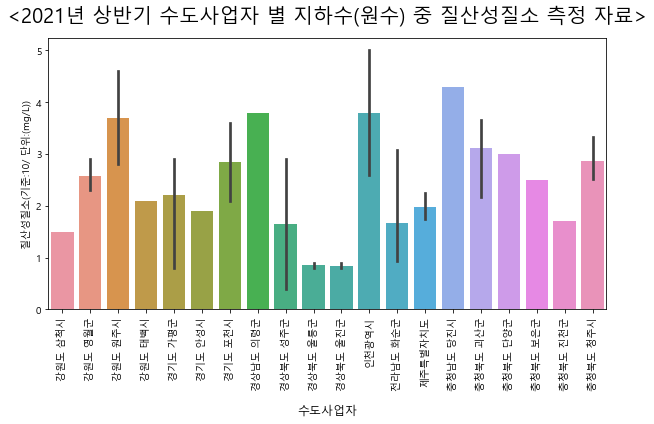

In [212]:
plt.figure(figsize=(10, 5))

sns.barplot(x='수도사업자', y='질산성질소(기준:10/ 단위:(mg/L))', data=ug)

plt.title('<2021년 상반기 수도사업자 별 지하수(원수) 중 질산성질소 측정 자료>', fontsize=20, pad=15)
plt.xlabel('수도사업자', fontsize=12, labelpad=15)
plt.xticks(rotation=90)

plt.savefig('../static/assets/images/underground_no3.png')
plt.show()

위는 평균값만 나와서 값들 중 기준치를 벗어나는 경우가 있어도 확인할 수 없음 -> **Boxplot**으로 interquartile과 outlier를 확인

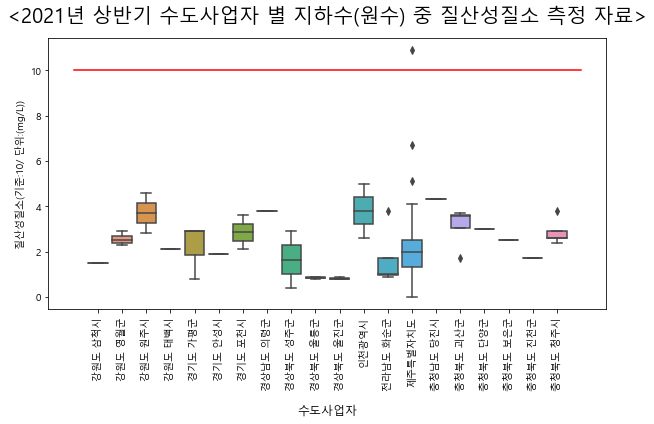

In [213]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='수도사업자', y='질산성질소(기준:10/ 단위:(mg/L))', data=ug)

# 기준선 line plot
x = np.arange(-1, 21)
y = x*0 + 10
plt.plot(x, y, '-r')

plt.title('<2021년 상반기 수도사업자 별 지하수(원수) 중 질산성질소 측정 자료>', fontsize=20, pad=15)
plt.xlabel('수도사업자', fontsize=12, labelpad=15)
plt.xticks(rotation=90)

plt.savefig('../static/assets/images/underground_boxplot.png')
plt.show()

In [201]:
# x축 표시 이름
ug['취수장명'] = ug['수도사업자'] + '/' + ug['취수장명']

In [202]:
ug

,검사년도,검사반기,수도사업자,취수장명,측정지점명,측정지점주소,채수지점구분,정수장명,수원,채수년월일,...,질산성질소(기준:10/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),음이온 계면활성제(기준:0/ 단위:(mg/L))
0,2021,상반기,강원도 삼척시,강원도 삼척시/임원,임원,강원도 삼척시 원덕읍 임원리 915,착수정,임원,지하수,20210603,...,1.5,0,0,0,0,0,0,0,0,0
1,2021,상반기,강원도 영월군,강원도 영월군/영월,영월,강원도 영월군 영월읍 영흥리 산382,취수구,영월,지하수,20210603,...,2.5,0,0,0,0,0,0,0,0,0
2,2021,상반기,강원도 영월군,강원도 영월군/주천,주천,강원도 영월군 주천면 도천길 673,취수구,주천,지하수,20210603,...,2.9,0,0,0,0,0,0,0,0,0
3,2021,상반기,강원도 영월군,강원도 영월군/하동,하동,강원도 영월군 김삿갓면 강변로 1462-23,취수구,하동,지하수,20210603,...,2.3,0,0,0,0,0,0,0,0,0
4,2021,상반기,강원도 원주시,강원도 원주시/귀래,귀래,강원도 원주시 귀래면 한치길 1141,취수구,귀래정수장,지하수,20210608,...,2.8,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2021,상반기,충청북도 청주시,충청북도 청주시/낭성 #2관정,낭성 2,충청북도 청주시 상당구 낭성면 이목리 865,취수구,낭성,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
145,2021,상반기,충청북도 청주시,충청북도 청주시/미원 #1관정,미원 1,충청북도 청주시 상당구 미원면 쌍이리 393,취수구,미원,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
146,2021,상반기,충청북도 청주시,충청북도 청주시/미원 #2관정,미원 2,충청북도 청주시 상당구 미원면 내산리 962,취수구,미원,지하수,20210615,...,2.4,0,0,0,0,0,0,0,0,0
147,2021,상반기,충청북도 청주시,충청북도 청주시/미원 #3관정,미원 3,충청북도 청주시 상당구 미원면 내산리 519,취수구,미원,지하수,20210615,...,3.8,0,0,0,0,0,0,0,0,0


In [203]:
# 질산성 질소 높은 순으로 15개만 추출해서 기준치 근처값만 보기
no3 = ug.sort_values('질산성질소(기준:10/ 단위:(mg/L))', ascending=False, ignore_index=True)
no3 = no3.loc[0:14, ['취수장명', '질산성질소(기준:10/ 단위:(mg/L))']]    # 수도사업자로 하면 중복되어서 고유한 값인 취수장명을 사용
no3.set_index('취수장명', inplace=True)
no3

,질산성질소(기준:10/ 단위:(mg/L))
취수장명,
제주특별자치도/옹포수원,10.9
제주특별자치도/회천광역수원,6.7
제주특별자치도/회천광역수원,5.1
인천광역시/길상,5.0
강원도 원주시/신림,4.6
충청남도 당진시/합덕,4.3
제주특별자치도/상예수원 대왕수,4.1
제주특별자치도/회천광역수원,4.1
경상남도 의령군/서동,3.8


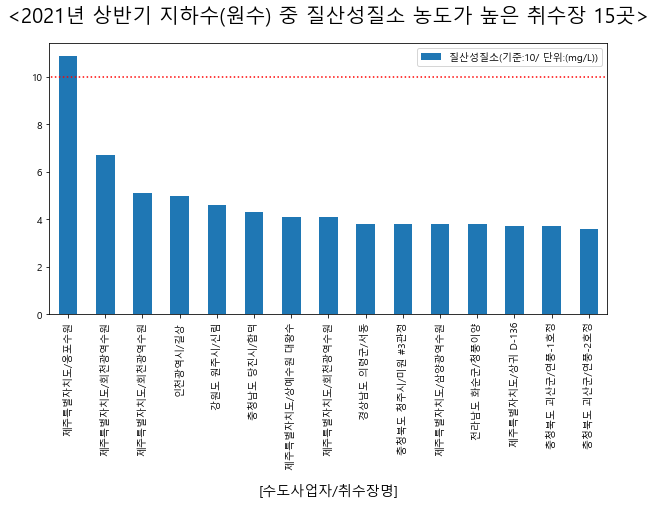

In [211]:
# 그룹화하지 않을 것이기 때문에 matplotlib 사용
no3.plot(kind='bar', figsize=(10, 5))

# 기준선 line plot
x = np.arange(-1, 16)
y = x*0 + 10
plt.plot(x, y, ':r')

plt.title('<2021년 상반기 지하수(원수) 중 질산성질소 농도가 높은 취수장 15곳>', fontsize=20, pad=20)
plt.xlabel('[수도사업자/취수장명]', fontsize=14, labelpad=15)

# plt.savefig('../static/assets/images/underground_sorted.png')
plt.show()

## Radon in Tap Water
* 라돈 기준: 148 (Bq/L)

In [205]:
rd = pd.read_excel('../data/rawdata/radon.xlsx', engine='openpyxl')
rd.head()    

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon
0,2021,상반기,부산광역시,A고지,부산광역시 강서구,지하수,40.0,20210527,0.0
1,2021,상반기,부산광역시,고촌1,부산광역시 기장군,지하수,100.0,20210511,0.0
2,2021,상반기,부산광역시,구칠,부산광역시 기장군,지하수,100.0,20210513,0.0
3,2021,상반기,부산광역시,덕산,부산광역시 기장군,지하수,100.0,20210506,8.3
4,2021,상반기,부산광역시,덕천,부산광역시 북구,지하수,140.0,20210503,16.3


In [206]:
rd.sort_values('Radon', ascending=False, ignore_index=True, inplace=True)
rd

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon
0,2021,상반기,충청북도 음성군,선골,충청북도 음성군,지하수,40.0,20200730,712.0
1,2021,상반기,경상북도 상주시,덕암동(선돌),경상북도 상주시,지하수,70.0,20210419,447.6
2,2021,상반기,충청북도 음성군,수리울,충청북도 음성군,지하수,300.0,20200729,437.8
3,2021,상반기,충청남도 천안시,도림1리(보덕),충청남도 천안시,지하수,30.0,20210609,330.9
4,2021,상반기,충청남도 천안시,호당1리(효견),충청남도 천안시,지하수,24.0,20210609,315.3
...,...,...,...,...,...,...,...,...,...
5947,2021,상반기,경상북도 울진군,내선미,경상북도 울진군,지하수,71.0,20210512,0.0
5948,2021,상반기,경상북도 울진군,나실,경상북도 울진군,지하수,54.0,20210524,0.0
5949,2021,상반기,경상북도 울진군,금강송에코리움,경상북도 울진군,지하수,197.0,20210524,0.0
5950,2021,상반기,경상북도 영주시,점마,경상북도 영주시,지하수,198.0,20210514,0.0


In [207]:
# x축 고려해서 소재지 + 시설명 만들기
rd['소재지 / 정수장명'] = rd['소재지'] + ' / ' + rd['시설명']
rd

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon,소재지 / 정수장명
0,2021,상반기,충청북도 음성군,선골,충청북도 음성군,지하수,40.0,20200730,712.0,충청북도 음성군 / 선골
1,2021,상반기,경상북도 상주시,덕암동(선돌),경상북도 상주시,지하수,70.0,20210419,447.6,경상북도 상주시 / 덕암동(선돌)
2,2021,상반기,충청북도 음성군,수리울,충청북도 음성군,지하수,300.0,20200729,437.8,충청북도 음성군 / 수리울
3,2021,상반기,충청남도 천안시,도림1리(보덕),충청남도 천안시,지하수,30.0,20210609,330.9,충청남도 천안시 / 도림1리(보덕)
4,2021,상반기,충청남도 천안시,호당1리(효견),충청남도 천안시,지하수,24.0,20210609,315.3,충청남도 천안시 / 호당1리(효견)
...,...,...,...,...,...,...,...,...,...,...
5947,2021,상반기,경상북도 울진군,내선미,경상북도 울진군,지하수,71.0,20210512,0.0,경상북도 울진군 / 내선미
5948,2021,상반기,경상북도 울진군,나실,경상북도 울진군,지하수,54.0,20210524,0.0,경상북도 울진군 / 나실
5949,2021,상반기,경상북도 울진군,금강송에코리움,경상북도 울진군,지하수,197.0,20210524,0.0,경상북도 울진군 / 금강송에코리움
5950,2021,상반기,경상북도 영주시,점마,경상북도 영주시,지하수,198.0,20210514,0.0,경상북도 영주시 / 점마


In [208]:
# 기준치 이상인 곳만 추출
rd148 = rd[rd['Radon'] > 148]
rd148

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon,소재지 / 정수장명
0,2021,상반기,충청북도 음성군,선골,충청북도 음성군,지하수,40.0,20200730,712.0,충청북도 음성군 / 선골
1,2021,상반기,경상북도 상주시,덕암동(선돌),경상북도 상주시,지하수,70.0,20210419,447.6,경상북도 상주시 / 덕암동(선돌)
2,2021,상반기,충청북도 음성군,수리울,충청북도 음성군,지하수,300.0,20200729,437.8,충청북도 음성군 / 수리울
3,2021,상반기,충청남도 천안시,도림1리(보덕),충청남도 천안시,지하수,30.0,20210609,330.9,충청남도 천안시 / 도림1리(보덕)
4,2021,상반기,충청남도 천안시,호당1리(효견),충청남도 천안시,지하수,24.0,20210609,315.3,충청남도 천안시 / 호당1리(효견)
5,2021,상반기,충청남도 부여군,안뜸,충청남도 부여군,지하수,20.0,20210618,289.0,충청남도 부여군 / 안뜸
6,2021,상반기,강원도 정선군,월루3,강원도 정선군,지하수,50.0,20210525,284.1,강원도 정선군 / 월루3
7,2021,상반기,전라남도 강진군,신덕,전라남도 강진군,지하수,8.0,20210218,266.8,전라남도 강진군 / 신덕
8,2021,상반기,충청남도 천안시,서흥1리(동막),충청남도 천안시,지하수,30.0,20210609,241.4,충청남도 천안시 / 서흥1리(동막)
9,2021,상반기,충청남도 부여군,가중2,충청남도 부여군,지하수,60.0,20210520,240.5,충청남도 부여군 / 가중2


### Lollipop Plot

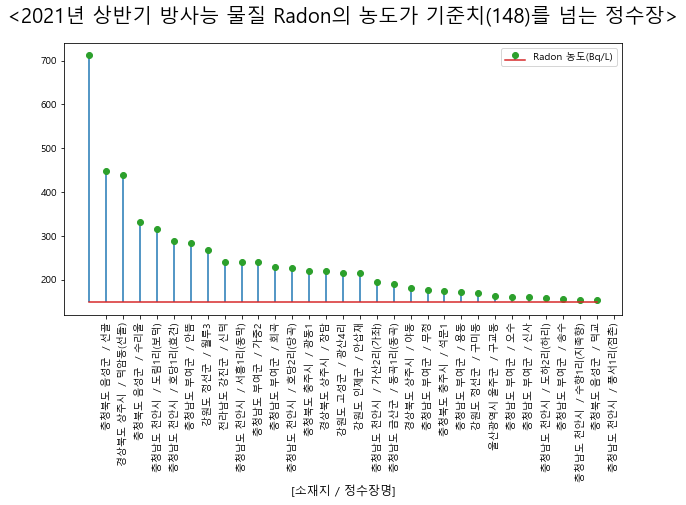

In [218]:
plt.figure(figsize=(10, 5))
plt.stem(rd148['Radon'], markerfmt='C2o', bottom=148, label='Radon 농도(Bq/L)')
plt.xticks(range(1, len(rd148)+1), rd148['소재지 / 정수장명'], rotation=90)

plt.title('<2021년 상반기 방사능 물질 Radon의 농도가 기준치(148)를 넘는 정수장>', fontsize=20, pad=20)
plt.xlabel('[소재지 / 정수장명]', fontsize=12)

plt.legend()

# plt.savefig('../static/assets/images/lollipop_plot.png')    # 그래프 아랫부분이 짤린채로 저장된다 -> 직접 저장함
plt.show()

# Health Data Change by Years
* 연도별 변화 양상을 **scatter plot loop**으로 만든 뒤 --> Magick을 이용해서 .gif로 만들어서 animation 효과 주기
* Scatter plot의 s(size)값을 주기 위해서 **지역별 인구 정보 추가**하기

주민통계사이트는 pd.read_html과 selenium webscraping 모두 먹히지 않아서 파일 다운로드...

In [1032]:
df = pd.read_csv('../data/rawdata/population.csv', encoding='euc-kr')
df.head()

,행정구역,2009년_총인구수,2009년_세대수,2009년_남자 인구수,2009년_여자 인구수,2010년_총인구수,2010년_세대수,2010년_남자 인구수,2010년_여자 인구수,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,2013년_세대수,2013년_남자 인구수,2013년_여자 인구수,2014년_총인구수,2014년_세대수,2014년_남자 인구수,2014년_여자 인구수,2015년_총인구수,2015년_세대수,2015년_남자 인구수,2015년_여자 인구수,2016년_총인구수,2016년_세대수,2016년_남자 인구수,2016년_여자 인구수,2017년_총인구수,2017년_세대수,2017년_남자 인구수,2017년_여자 인구수,2018년_총인구수,2018년_세대수,2018년_남자 인구수,2018년_여자 인구수
0,전국 (1000000000),"49,773,145","19,261,292","24,929,939","24,843,206","50,515,666","19,865,179","25,310,385","25,205,281","50,734,284","20,033,142","25,406,934","25,327,350","50,948,272","20,211,770","25,504,060","25,444,212","51,141,463","20,456,588","25,588,336","25,553,127","51,327,916","20,724,094","25,669,296","25,658,620","51,529,338","21,011,152","25,758,186","25,771,152","51,696,216","21,294,009","25,827,594","25,868,622","51,778,544","21,632,851","25,855,919","25,922,625","51,826,059","22,042,947","25,866,129","25,959,930"
1,서울특별시 (1100000000),"10,208,302","4,116,660","5,059,269","5,149,033","10,312,545","4,224,181","5,111,259","5,201,286","10,249,679","4,192,752","5,073,899","5,175,780","10,195,318","4,177,970","5,041,336","5,153,982","10,143,645","4,182,351","5,007,869","5,135,776","10,103,233","4,194,176","4,979,768","5,123,465","10,022,181","4,189,948","4,930,943","5,091,238","9,930,616","4,189,839","4,876,789","5,053,827","9,857,426","4,220,082","4,830,206","5,027,220","9,765,623","4,263,868","4,773,899","4,991,724"
2,부산광역시 (2600000000),"3,543,030","1,323,771","1,761,202","1,781,828","3,567,910","1,371,346","1,773,170","1,794,740","3,550,963","1,381,257","1,762,848","1,788,115","3,538,484","1,389,526","1,754,479","1,784,005","3,527,635","1,404,663","1,747,000","1,780,635","3,519,401","1,421,648","1,740,417","1,778,984","3,513,777","1,437,818","1,735,570","1,778,207","3,498,529","1,451,270","1,725,607","1,772,922","3,470,653","1,467,555","1,709,508","1,761,145","3,441,453","1,480,468","1,692,421","1,749,032"
3,대구광역시 (2700000000),"2,489,781","906,470","1,243,878","1,245,903","2,511,676","934,598","1,255,245","1,256,431","2,507,271","940,770","1,251,577","1,255,694","2,505,644","948,652","1,249,320","1,256,324","2,501,588","960,265","1,246,071","1,255,517","2,493,264","970,618","1,241,119","1,252,145","2,487,829","982,360","1,237,291","1,250,538","2,484,557","994,220","1,234,169","1,250,388","2,475,231","1,006,753","1,227,814","1,247,417","2,461,769","1,021,266","1,219,342","1,242,427"
4,인천광역시 (2800000000),"2,710,579","1,026,936","1,364,809","1,345,770","2,758,296","1,059,664","1,390,356","1,367,940","2,801,274","1,077,563","1,410,980","1,390,294","2,843,981","1,097,491","1,431,593","1,412,388","2,879,782","1,118,988","1,448,835","1,430,947","2,902,608","1,136,280","1,459,074","1,443,534","2,925,815","1,154,004","1,469,869","1,455,946","2,943,069","1,171,399","1,477,671","1,465,398","2,948,542","1,188,917","1,479,597","1,468,945","2,954,642","1,213,201","1,481,844","1,472,798"


In [1033]:
# '전국'행 지움
df.drop(index=0, inplace=True)

In [1034]:
# '행정구역' 컬럼에서 뒤에 붙는 코드 삭제
df.loc[1, '행정구역']    # 행정구역 글자 사이에 빈칸이 있음

lst = df['행정구역'].str.split(' ')
df['행정구역'] = lst.str.get(0)
df.head()

,행정구역,2009년_총인구수,2009년_세대수,2009년_남자 인구수,2009년_여자 인구수,2010년_총인구수,2010년_세대수,2010년_남자 인구수,2010년_여자 인구수,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,2013년_세대수,2013년_남자 인구수,2013년_여자 인구수,2014년_총인구수,2014년_세대수,2014년_남자 인구수,2014년_여자 인구수,2015년_총인구수,2015년_세대수,2015년_남자 인구수,2015년_여자 인구수,2016년_총인구수,2016년_세대수,2016년_남자 인구수,2016년_여자 인구수,2017년_총인구수,2017년_세대수,2017년_남자 인구수,2017년_여자 인구수,2018년_총인구수,2018년_세대수,2018년_남자 인구수,2018년_여자 인구수
1,서울특별시,"10,208,302","4,116,660","5,059,269","5,149,033","10,312,545","4,224,181","5,111,259","5,201,286","10,249,679","4,192,752","5,073,899","5,175,780","10,195,318","4,177,970","5,041,336","5,153,982","10,143,645","4,182,351","5,007,869","5,135,776","10,103,233","4,194,176","4,979,768","5,123,465","10,022,181","4,189,948","4,930,943","5,091,238","9,930,616","4,189,839","4,876,789","5,053,827","9,857,426","4,220,082","4,830,206","5,027,220","9,765,623","4,263,868","4,773,899","4,991,724"
2,부산광역시,"3,543,030","1,323,771","1,761,202","1,781,828","3,567,910","1,371,346","1,773,170","1,794,740","3,550,963","1,381,257","1,762,848","1,788,115","3,538,484","1,389,526","1,754,479","1,784,005","3,527,635","1,404,663","1,747,000","1,780,635","3,519,401","1,421,648","1,740,417","1,778,984","3,513,777","1,437,818","1,735,570","1,778,207","3,498,529","1,451,270","1,725,607","1,772,922","3,470,653","1,467,555","1,709,508","1,761,145","3,441,453","1,480,468","1,692,421","1,749,032"
3,대구광역시,"2,489,781","906,470","1,243,878","1,245,903","2,511,676","934,598","1,255,245","1,256,431","2,507,271","940,770","1,251,577","1,255,694","2,505,644","948,652","1,249,320","1,256,324","2,501,588","960,265","1,246,071","1,255,517","2,493,264","970,618","1,241,119","1,252,145","2,487,829","982,360","1,237,291","1,250,538","2,484,557","994,220","1,234,169","1,250,388","2,475,231","1,006,753","1,227,814","1,247,417","2,461,769","1,021,266","1,219,342","1,242,427"
4,인천광역시,"2,710,579","1,026,936","1,364,809","1,345,770","2,758,296","1,059,664","1,390,356","1,367,940","2,801,274","1,077,563","1,410,980","1,390,294","2,843,981","1,097,491","1,431,593","1,412,388","2,879,782","1,118,988","1,448,835","1,430,947","2,902,608","1,136,280","1,459,074","1,443,534","2,925,815","1,154,004","1,469,869","1,455,946","2,943,069","1,171,399","1,477,671","1,465,398","2,948,542","1,188,917","1,479,597","1,468,945","2,954,642","1,213,201","1,481,844","1,472,798"
5,광주광역시,"1,433,640","524,093","711,091","722,549","1,454,636","540,875","721,780","732,856","1,463,464","549,105","725,606","737,858","1,469,216","555,538","728,406","740,810","1,472,910","563,599","730,216","742,694","1,475,884","573,043","731,339","744,545","1,472,199","580,427","729,662","742,537","1,469,214","586,464","728,137","741,077","1,463,770","592,818","725,295","738,475","1,459,336","603,107","722,581","736,755"


In [1035]:
# '행정구역'을 index로 설정
df.set_index('행정구역', inplace=True)
df.head()

,2009년_총인구수,2009년_세대수,2009년_남자 인구수,2009년_여자 인구수,2010년_총인구수,2010년_세대수,2010년_남자 인구수,2010년_여자 인구수,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,2013년_세대수,2013년_남자 인구수,2013년_여자 인구수,2014년_총인구수,2014년_세대수,2014년_남자 인구수,2014년_여자 인구수,2015년_총인구수,2015년_세대수,2015년_남자 인구수,2015년_여자 인구수,2016년_총인구수,2016년_세대수,2016년_남자 인구수,2016년_여자 인구수,2017년_총인구수,2017년_세대수,2017년_남자 인구수,2017년_여자 인구수,2018년_총인구수,2018년_세대수,2018년_남자 인구수,2018년_여자 인구수
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,"10,208,302","4,116,660","5,059,269","5,149,033","10,312,545","4,224,181","5,111,259","5,201,286","10,249,679","4,192,752","5,073,899","5,175,780","10,195,318","4,177,970","5,041,336","5,153,982","10,143,645","4,182,351","5,007,869","5,135,776","10,103,233","4,194,176","4,979,768","5,123,465","10,022,181","4,189,948","4,930,943","5,091,238","9,930,616","4,189,839","4,876,789","5,053,827","9,857,426","4,220,082","4,830,206","5,027,220","9,765,623","4,263,868","4,773,899","4,991,724"
부산광역시,"3,543,030","1,323,771","1,761,202","1,781,828","3,567,910","1,371,346","1,773,170","1,794,740","3,550,963","1,381,257","1,762,848","1,788,115","3,538,484","1,389,526","1,754,479","1,784,005","3,527,635","1,404,663","1,747,000","1,780,635","3,519,401","1,421,648","1,740,417","1,778,984","3,513,777","1,437,818","1,735,570","1,778,207","3,498,529","1,451,270","1,725,607","1,772,922","3,470,653","1,467,555","1,709,508","1,761,145","3,441,453","1,480,468","1,692,421","1,749,032"
대구광역시,"2,489,781","906,470","1,243,878","1,245,903","2,511,676","934,598","1,255,245","1,256,431","2,507,271","940,770","1,251,577","1,255,694","2,505,644","948,652","1,249,320","1,256,324","2,501,588","960,265","1,246,071","1,255,517","2,493,264","970,618","1,241,119","1,252,145","2,487,829","982,360","1,237,291","1,250,538","2,484,557","994,220","1,234,169","1,250,388","2,475,231","1,006,753","1,227,814","1,247,417","2,461,769","1,021,266","1,219,342","1,242,427"
인천광역시,"2,710,579","1,026,936","1,364,809","1,345,770","2,758,296","1,059,664","1,390,356","1,367,940","2,801,274","1,077,563","1,410,980","1,390,294","2,843,981","1,097,491","1,431,593","1,412,388","2,879,782","1,118,988","1,448,835","1,430,947","2,902,608","1,136,280","1,459,074","1,443,534","2,925,815","1,154,004","1,469,869","1,455,946","2,943,069","1,171,399","1,477,671","1,465,398","2,948,542","1,188,917","1,479,597","1,468,945","2,954,642","1,213,201","1,481,844","1,472,798"
광주광역시,"1,433,640","524,093","711,091","722,549","1,454,636","540,875","721,780","732,856","1,463,464","549,105","725,606","737,858","1,469,216","555,538","728,406","740,810","1,472,910","563,599","730,216","742,694","1,475,884","573,043","731,339","744,545","1,472,199","580,427","729,662","742,537","1,469,214","586,464","728,137","741,077","1,463,770","592,818","725,295","738,475","1,459,336","603,107","722,581","736,755"


In [1036]:
# '총 인구수' 컬럼만 추출
sr_lst = []

for i in range(0, len(df.columns), 4):
    sr_lst.append(df.iloc[:, i])

pop = pd.DataFrame(sr_lst).T
pop

,2009년_총인구수,2010년_총인구수,2011년_총인구수,2012년_총인구수,2013년_총인구수,2014년_총인구수,2015년_총인구수,2016년_총인구수,2017년_총인구수,2018년_총인구수
행정구역,,,,,,,,,,
서울특별시,"10,208,302","10,312,545","10,249,679","10,195,318","10,143,645","10,103,233","10,022,181","9,930,616","9,857,426","9,765,623"
부산광역시,"3,543,030","3,567,910","3,550,963","3,538,484","3,527,635","3,519,401","3,513,777","3,498,529","3,470,653","3,441,453"
대구광역시,"2,489,781","2,511,676","2,507,271","2,505,644","2,501,588","2,493,264","2,487,829","2,484,557","2,475,231","2,461,769"
인천광역시,"2,710,579","2,758,296","2,801,274","2,843,981","2,879,782","2,902,608","2,925,815","2,943,069","2,948,542","2,954,642"
광주광역시,"1,433,640","1,454,636","1,463,464","1,469,216","1,472,910","1,475,884","1,472,199","1,469,214","1,463,770","1,459,336"
대전광역시,"1,484,180","1,503,664","1,515,603","1,524,583","1,532,811","1,531,809","1,518,775","1,514,370","1,502,227","1,489,936"
울산광역시,"1,114,866","1,126,298","1,135,494","1,147,256","1,156,480","1,166,377","1,173,534","1,172,304","1,165,132","1,155,623"
세종특별자치시,0,NaN,NaN,"113,117","122,153","156,125","210,884","243,048","280,100","314,126"
경기도,"11,460,610","11,786,622","11,937,415","12,093,299","12,234,630","12,357,830","12,522,606","12,716,780","12,873,895","13,077,153"


In [1037]:
# 컬럼명에서 '_총인구수' 부분 빼기
splited = pop.columns.str.split('_')
year = splited.str.get(0)
pop.columns = year
pop.head()

,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
행정구역,,,,,,,,,,
서울특별시,"10,208,302","10,312,545","10,249,679","10,195,318","10,143,645","10,103,233","10,022,181","9,930,616","9,857,426","9,765,623"
부산광역시,"3,543,030","3,567,910","3,550,963","3,538,484","3,527,635","3,519,401","3,513,777","3,498,529","3,470,653","3,441,453"
대구광역시,"2,489,781","2,511,676","2,507,271","2,505,644","2,501,588","2,493,264","2,487,829","2,484,557","2,475,231","2,461,769"
인천광역시,"2,710,579","2,758,296","2,801,274","2,843,981","2,879,782","2,902,608","2,925,815","2,943,069","2,948,542","2,954,642"
광주광역시,"1,433,640","1,454,636","1,463,464","1,469,216","1,472,910","1,475,884","1,472,199","1,469,214","1,463,770","1,459,336"


In [1038]:
# 세종시 확인
pop.loc['세종특별자치시']

2009년          0
2010년        NaN
2011년        NaN
2012년    113,117
2013년    122,153
2014년    156,125
2015년    210,884
2016년    243,048
2017년    280,100
2018년    314,126
Name: 세종특별자치시, dtype: object

In [1039]:
# Health data와 인구 데이터를 합칠 수 있도록 같은 형식으로 만듦
df_lst = []   # 시도별 인구수 dataframe을 모아서 concat할 예정

for ct in pop.index:
    sr = pop.loc[ct]
    df = pd.DataFrame({'지역':[ct]*10, '연도':range(2009, 2019), '인구수':sr.values})  
    df_lst.append(df)

In [1040]:
ct_pop = pd.concat(df_lst, axis=0)
ct_pop.head()

,지역,연도,인구수
0,서울특별시,2009,"10,208,302"
1,서울특별시,2010,"10,312,545"
2,서울특별시,2011,"10,249,679"
3,서울특별시,2012,"10,195,318"
4,서울특별시,2013,"10,143,645"


In [1041]:
# 인구수(,포함된 수)의 type 바꾸기
ct_pop.dtypes                       # 인구수: object
ct_pop['인구수'] = ct_pop['인구수'].str.replace(',', '')    # 컴마 제거

ct_pop.fillna(0, inplace=True)     # 세종시 2010, 2011년 인구수가 NaN으로 되어있는 것 0으로 치환

ct_pop = ct_pop.astype({'인구수':int})
ct_pop.dtypes

지역     object
연도      int64
인구수     int32
dtype: object

**합칠 건강데이터는 2012~2019년까지 최대한 세종특별자치시를 포함하고 있는 refined/heath/health.xlsx 데이터를 사용해야 함!**

In [1042]:
# 건강데이터와 인구수 데이터를 지역, 연도를 on으로 merge
hth_pop = pd.merge(left=h_rf, right=ct_pop, on=['지역', '연도'], how='inner')
hth_pop.head(30)

,지역,삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연도,연간보건기관이용률,인구수
0,서울특별시,0.964,49.6,31.2,7.8,29.7,2009,15.3,10208302
1,부산광역시,0.962,48.6,27.0,6.1,35.0,2009,21.6,3543030
2,대구광역시,0.962,43.9,29.2,8.2,38.9,2009,15.3,2489781
3,인천광역시,0.952,42.1,31.2,9.8,35.7,2009,18.2,2710579
4,광주광역시,0.957,50.3,28.4,7.0,32.8,2009,15.2,1433640
5,대전광역시,0.959,51.3,31.3,7.6,31.1,2009,18.4,1484180
6,울산광역시,0.965,45.9,24.6,5.4,36.9,2009,21.3,1114866
7,경기도,0.962,45.8,31.0,8.2,34.3,2009,18.2,11460610
8,강원도,0.951,44.4,28.5,9.1,38.5,2009,29.3,1512870
9,충청북도,0.962,52.0,25.8,5.6,33.2,2009,25.7,1527478


In [1266]:
# 상관계수, p-value 확인
# stats.pearsonr(hth_pop['스트레스인지율'], hth_pop['우울감경험률'])
stats.pearsonr(hth_pop['양호한주관적건강수준인지율'], hth_pop['연간보건기관이용률'])
# stats.pearsonr(hth_pop['스트레스인지율'], hth_pop['삶의질지수'])

(-0.013197224183158923, 0.8655825935535512)

In [189]:
hth_pop.min()   # 아래 xlim, ylim 구하기 위해서

삶의질지수                   0.931
양호한주관적건강수준인지율          36.500
스트레스인지율                20.400
우울감경험률                  3.100
주관적구강건강이나쁜인구의분율        22.200
연도                   2009.000
연간보건기관이용률              14.300
인구수                113117.000
dtype: float64

## Scatter Plot Loop for Later Animation

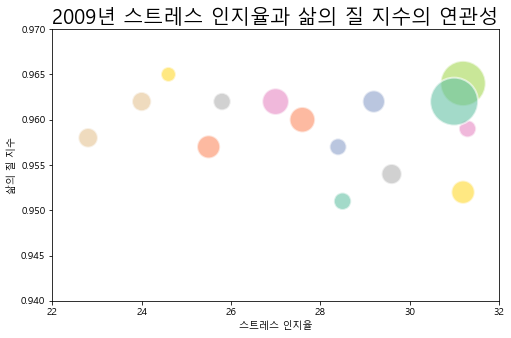

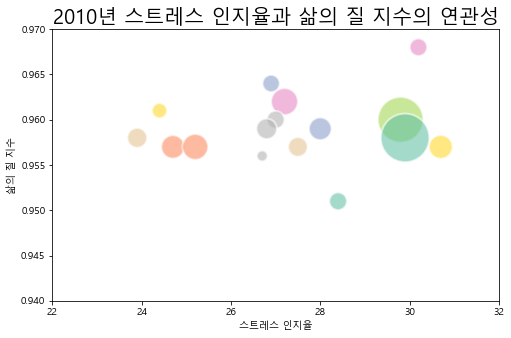

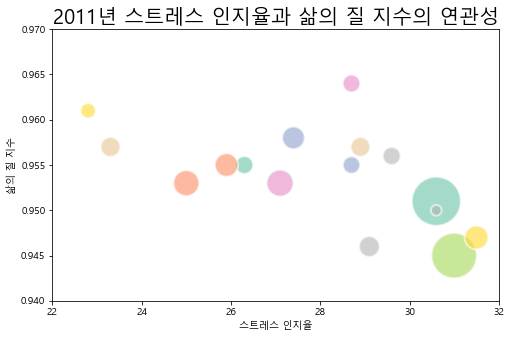

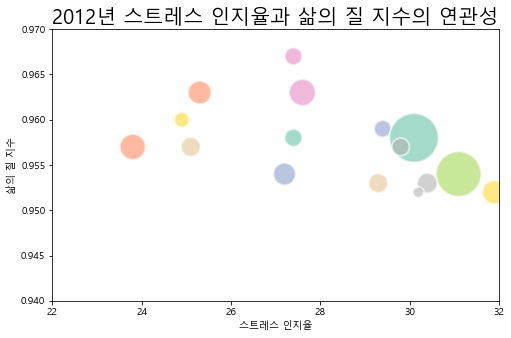

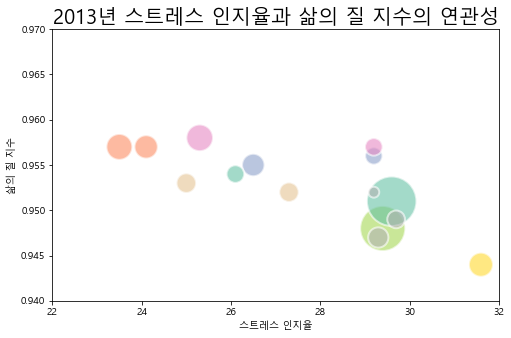

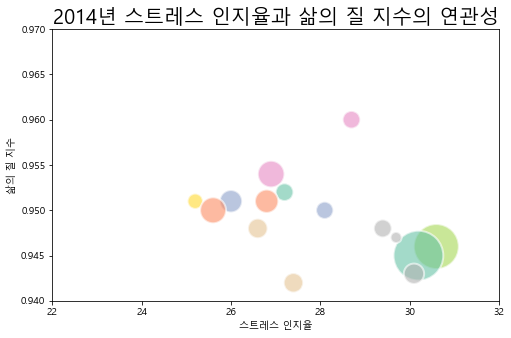

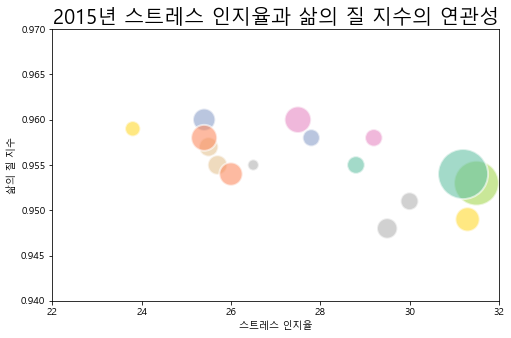

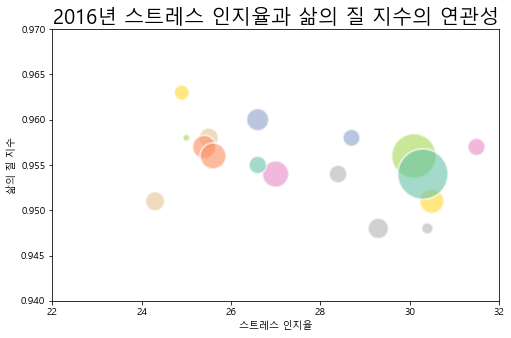

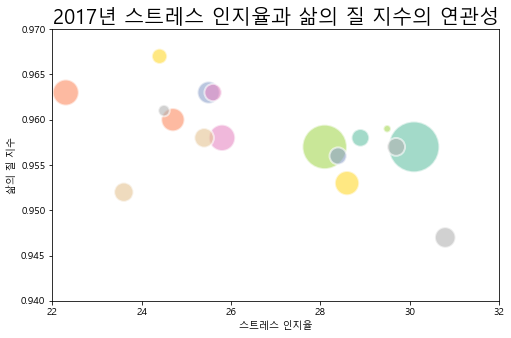

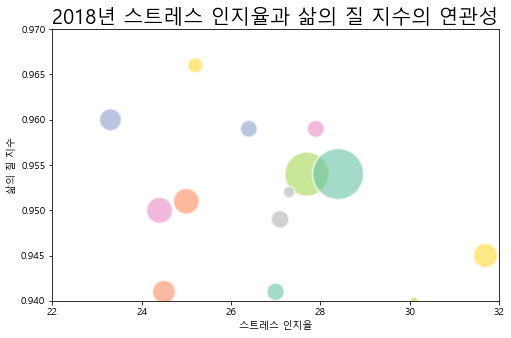

In [196]:
# 10년치 그래프 for loop
for year in hth_pop['연도'].unique():
    fig = plt.figure(figsize=(8, 5))   # dpi=dpi 제외
    
    hth_pop['지역'] = pd.Categorical(hth_pop['지역'])    # 지역을 카테고리로 만들어야, 추후 지역에 따른 다른 bubble color를 입힐 수 있음!
    
    sub = hth_pop[hth_pop['연도'] == year]
    
    plt.scatter(x=sub['스트레스인지율'],    # x, y 조정하여 여러 그래프 확인
                y=sub['삶의질지수'],
                s=sub['인구수']/5000,
                c=sub['지역'].cat.codes,
                cmap='Set2', alpha=0.6, edgecolors='white', linewidth=2)
    
    plt.title(str(year) + '년 스트레스 인지율과 삶의 질 지수의 연관성', fontsize=20)
    plt.xlabel('스트레스 인지율')
    plt.ylabel('삶의 질 지수')
    plt.xlim(22, 32)
    plt.ylim(0.94, 0.97)
    
    plt.savefig('../static/assets/images/scatterplot' + str(year) + '.png', dpi=96)
    plt.show()

In [143]:
# 번외) 카테고리화 연습
pd.Categorical(hth_pop['지역']).dtype          # CategoricalDtype
hth_pop['지역'] = pd.Categorical(hth_pop['지역'])
hth_pop.dtypes                # category
hth_pop['지역'].cat           # CategoricalAccessor object
hth_pop['지역'].cat.codes     # 카테고리를 숫자화

# 카테고리가 아닌 값을 지정한다면? -> 문서에는 error raise라고 되어있는데 예상대로 문제가 없다????????
hth_pop.loc['미국'] = ['뉴욕', 3.5, 2.5, 1.5, 3.0, 10.5, 2020, 8.5, 1000000]
hth_pop.tail()

,지역,삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연도,연간보건기관이용률,인구수
163,전라남도,0.935,43.8,25.4,4.4,29.8,2018,37.5,"1,882,970"
164,경상북도,0.941,38.8,24.5,5.3,31.0,2018,27.9,"2,676,831"
165,경상남도,0.951,38.1,25.0,5.2,31.1,2018,28.7,"3,373,988"
166,제주특별자치도,0.952,41.6,27.3,4.5,25.0,2018,26.8,"667,191"
미국,뉴욕,3.500,2.5,1.5,3.0,10.5,2020,8.5,1000000


# K-means Clustering & Logistic Regression
목표: K-means clustering으로 전처리하여 Logistic regression의 score를 높인다 <br>
1) 스트레스 인지율을  category bin을 만든다 --> Logistic regression <br>
2) K-means clustering 후 Logistic regression을 실행하여 score 비교

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

## Category Binning

In [1276]:
df = wh.copy()
df.head()

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),카드뮴(기준:0.005),붕소(기준:1),페놀(기준:0.005),다이아지논(기준:0.02),파라티온(기준:0.06),"1,2-디브로모-3-클로로프로판(기준:0.003)",페니트로티온(기준:0.04),카바릴(기준:0.07),"1,1,1-트리클로로에탄(기준:0.1)",테트라클로로에틸렌(기준:0.01),트리클로로에틸렌(기준:0.03),디클로로메탄(기준:0.02),벤젠(기준:0.01),톨루엔(기준:0.7),에틸벤젠(기준:0.3),크실렌(기준:0.5),"1,1-디클로로에틸렌(기준:0.03)",사염화탄소(기준:0.002),경도(기준:300),과망간산칼륨소비량(기준:10),동(기준:1),색도(기준:5),세제(기준:0.5),수소이온농도(기준:5.8 ~ 8.5),아연(기준:3),염소이온(기준:250),증발잔류물(기준:500),철(기준:0.3),망간(기준:0.05),황산이온(기준:200),알루미늄(기준:0.2),총트리할로메탄(기준:0.1),잔류염소(기준:4),클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0.0,1.681440,0.0,0.007404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,63.935260,1.264976,0.000068,0.000000,0.0,7.175548,0.000414,14.865450,98.850068,0.000000,0.000085,12.767918,0.029721,0.009816,0.617214,0.007183,0.002321,0.000000,0.001205,0.000000,0.009164,0.0,0.0,0.0,0.0,0.966,51.0,30.6,8.1,29.7,0.0
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,0.0,2.080971,0.0,0.046553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,84.404043,0.994504,0.000000,1.000000,0.0,6.786189,0.002017,31.699753,211.935882,0.000000,0.000000,54.325788,0.000000,0.030889,0.703778,0.016176,0.000315,0.000000,0.000086,0.000000,0.001610,0.0,0.0,0.0,0.0,0.964,48.3,29.8,6.8,35.0,0.0
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,0.0,1.618421,0.0,0.027690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,68.969298,1.318421,0.000000,0.000000,0.0,7.063616,0.002215,24.362573,141.093567,0.000000,0.000000,25.505848,0.005746,0.021913,0.521667,0.014198,0.002030,0.000207,0.000954,0.000062,0.009804,0.0,0.0,0.0,0.0,0.963,46.4,30.1,7.2,37.7,0.0
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,0.0,1.758860,0.0,0.002142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.0,62.798665,2.003656,0.000000,0.000000,0.0,7.337412,0.000731,13.802269,106.298370,0.000004,0.000000,12.069830,0.054709,0.019803,0.932074,0.014614,0.005862,0.000372,0.002220,0.000000,0.024049,0.0,0.0,0.0,0.0,0.962,49.8,27.3,8.8,35.1,0.0
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0.0,0.627183,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,17.916667,1.098016,0.000000,0.928571,0.0,6.721120,0.002407,6.827381,42.041667,0.000000,0.002841,4.150794,0.001925,0.017435,0.588492,0.011760,0.000930,0.000000,0.002256,0.000077,0.012505,0.0,0.0,0.0,0.0,0.951,48.4,26.8,8.7,35.4,0.0


In [1277]:
df['스트레스인지정도'] = pd.cut(df['스트레스인지율'], bins=3, labels=['낮음', '중간', '높음'], retbins=True, right=True, include_lowest=True)[0]  # 튜플 첫번째 값이 series
df.head()

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),카드뮴(기준:0.005),붕소(기준:1),페놀(기준:0.005),다이아지논(기준:0.02),파라티온(기준:0.06),"1,2-디브로모-3-클로로프로판(기준:0.003)",페니트로티온(기준:0.04),카바릴(기준:0.07),"1,1,1-트리클로로에탄(기준:0.1)",테트라클로로에틸렌(기준:0.01),트리클로로에틸렌(기준:0.03),디클로로메탄(기준:0.02),벤젠(기준:0.01),톨루엔(기준:0.7),에틸벤젠(기준:0.3),크실렌(기준:0.5),"1,1-디클로로에틸렌(기준:0.03)",사염화탄소(기준:0.002),경도(기준:300),과망간산칼륨소비량(기준:10),동(기준:1),색도(기준:5),세제(기준:0.5),수소이온농도(기준:5.8 ~ 8.5),아연(기준:3),염소이온(기준:250),증발잔류물(기준:500),철(기준:0.3),망간(기준:0.05),황산이온(기준:200),알루미늄(기준:0.2),총트리할로메탄(기준:0.1),잔류염소(기준:4),클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률,스트레스인지정도
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0.0,1.681440,0.0,0.007404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,63.935260,1.264976,0.000068,0.000000,0.0,7.175548,0.000414,14.865450,98.850068,0.000000,0.000085,12.767918,0.029721,0.009816,0.617214,0.007183,0.002321,0.000000,0.001205,0.000000,0.009164,0.0,0.0,0.0,0.0,0.966,51.0,30.6,8.1,29.7,0.0,높음
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,0.0,2.080971,0.0,0.046553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,84.404043,0.994504,0.000000,1.000000,0.0,6.786189,0.002017,31.699753,211.935882,0.000000,0.000000,54.325788,0.000000,0.030889,0.703778,0.016176,0.000315,0.000000,0.000086,0.000000,0.001610,0.0,0.0,0.0,0.0,0.964,48.3,29.8,6.8,35.0,0.0,높음
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,0.0,1.618421,0.0,0.027690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,68.969298,1.318421,0.000000,0.000000,0.0,7.063616,0.002215,24.362573,141.093567,0.000000,0.000000,25.505848,0.005746,0.021913,0.521667,0.014198,0.002030,0.000207,0.000954,0.000062,0.009804,0.0,0.0,0.0,0.0,0.963,46.4,30.1,7.2,37.7,0.0,높음
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,0.0,1.758860,0.0,0.002142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.0,62.798665,2.003656,0.000000,0.000000,0.0,7.337412,0.000731,13.802269,106.298370,0.000004,0.000000,12.069830,0.054709,0.019803,0.932074,0.014614,0.005862,0.000372,0.002220,0.000000,0.024049,0.0,0.0,0.0,0.0,0.962,49.8,27.3,8.8,35.1,0.0,중간
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0.0,0.627183,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,17.916667,1.098016,0.000000,0.928571,0.0,6.721120,0.002407,6.827381,42.041667,0.000000,0.002841,4.150794,0.001925,0.017435,0.588492,0.011760,0.000930,0.000000,0.002256,0.000077,0.012505,0.0,0.0,0.0,0.0,0.951,48.4,26.8,8.7,35.4,0.0,중간


In [1278]:
df['우울감경험정도'] = pd.cut(df['우울감경험률'], bins=3, labels=['낮음', '중간', '높음'], retbins=True, right=True, include_lowest=True)[0]
df.head(2)

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),카드뮴(기준:0.005),붕소(기준:1),페놀(기준:0.005),다이아지논(기준:0.02),파라티온(기준:0.06),"1,2-디브로모-3-클로로프로판(기준:0.003)",페니트로티온(기준:0.04),카바릴(기준:0.07),"1,1,1-트리클로로에탄(기준:0.1)",테트라클로로에틸렌(기준:0.01),트리클로로에틸렌(기준:0.03),디클로로메탄(기준:0.02),벤젠(기준:0.01),톨루엔(기준:0.7),에틸벤젠(기준:0.3),크실렌(기준:0.5),"1,1-디클로로에틸렌(기준:0.03)",사염화탄소(기준:0.002),경도(기준:300),과망간산칼륨소비량(기준:10),동(기준:1),색도(기준:5),세제(기준:0.5),수소이온농도(기준:5.8 ~ 8.5),아연(기준:3),염소이온(기준:250),증발잔류물(기준:500),철(기준:0.3),망간(기준:0.05),황산이온(기준:200),알루미늄(기준:0.2),총트리할로메탄(기준:0.1),잔류염소(기준:4),클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률,스트레스인지정도,우울감경험정도
0,2008,서울특별시,0.0,0.0,0.00000,0.0,0.0,0,0.0,0.0,0.0,1.681440,0.0,0.007404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.935260,1.264976,0.000068,0.0,0.0,7.175548,0.000414,14.865450,98.850068,0.0,0.000085,12.767918,0.029721,0.009816,0.617214,0.007183,0.002321,0.0,0.001205,0.0,0.009164,0.0,0.0,0.0,0.0,0.966,51.0,30.6,8.1,29.7,0.0,높음,높음
1,2008,부산광역시,0.0,0.0,0.03331,0.0,0.0,0,0.0,0.0,0.0,2.080971,0.0,0.046553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.404043,0.994504,0.000000,1.0,0.0,6.786189,0.002017,31.699753,211.935882,0.0,0.000000,54.325788,0.000000,0.030889,0.703778,0.016176,0.000315,0.0,0.000086,0.0,0.001610,0.0,0.0,0.0,0.0,0.964,48.3,29.8,6.8,35.0,0.0,높음,중간


## 모든 수질 컬럼을 다 이용한 경우

In [229]:
water.head()   # index=2 컬럼부터 사용
w = water.iloc[:, 2:]
w.shape

(197, 53)

In [231]:
# Standardisation
scaler = StandardScaler()
w_trans = scaler.fit_transform(w)
w_trans.shape

(197, 53)

In [333]:
km = KMeans(n_clusters=10, n_init=10, max_iter=300)     # n_init: 초기 임의의 centeroid 시도하는 횟수, max_iter: clustering 최대 반복 횟수
km.fit(w_trans)

KMeans(n_clusters=10)

In [268]:
km.labels_       # x의 label

array([0, 1, 0, 3, 0, 3, 3, 3, 0, 2, 3, 3, 2, 2, 1, 0, 0, 1, 1, 3, 0, 3,
       1, 4, 0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 3, 0, 3, 1, 3, 0, 3, 3, 3,
       2, 3, 1, 0, 0, 1, 1, 3, 0, 3, 1, 3, 0, 3, 3, 3, 2, 3, 1, 0, 0, 1,
       1, 3, 0, 3, 1, 1, 3, 0, 3, 2, 3, 2, 3, 1, 0, 0, 1, 1, 3, 0, 3, 1,
       1, 3, 0, 3, 3, 3, 2, 3, 1, 0, 0, 1, 1, 3, 0, 3, 1, 2, 3, 0, 3, 3,
       3, 2, 3, 1, 0, 0, 1, 1, 3, 0, 3, 1, 2, 3, 0, 3, 1, 3, 2, 3, 1, 0,
       0, 1, 1, 3, 0, 3, 1, 3, 3, 0, 3, 1, 3, 3, 3, 1, 0, 0, 1, 1, 3, 0,
       3, 1, 3, 0, 3, 1, 3, 2, 1, 1, 0, 0, 1, 1, 3, 0, 3, 1, 3, 2, 3, 1,
       3, 2, 1, 1, 0, 0, 1, 1, 3, 0, 3, 1, 3, 0, 3, 1, 3, 3, 3, 1, 0])

In [252]:
km.predict(w_trans)    # x 예측라벨 = labels_

array([0, 2, 0, 8, 5, 8, 8, 8, 0, 6, 6, 5, 6, 6, 1, 0, 0, 2, 1, 8, 5, 8,
       2, 3, 0, 6, 6, 8, 4, 8, 1, 0, 0, 2, 2, 8, 5, 8, 2, 7, 0, 8, 6, 6,
       4, 6, 1, 0, 0, 2, 2, 8, 5, 8, 2, 8, 0, 6, 6, 6, 4, 6, 1, 0, 0, 2,
       2, 8, 5, 8, 2, 6, 8, 0, 8, 6, 6, 4, 8, 1, 0, 0, 2, 2, 8, 5, 8, 2,
       0, 8, 0, 8, 6, 6, 4, 6, 1, 0, 0, 2, 2, 8, 5, 8, 2, 9, 8, 0, 8, 6,
       8, 4, 6, 1, 0, 0, 2, 2, 8, 5, 8, 2, 0, 8, 0, 8, 6, 8, 6, 8, 2, 0,
       0, 2, 2, 8, 5, 8, 2, 6, 8, 0, 8, 2, 8, 5, 6, 2, 0, 0, 2, 2, 8, 5,
       8, 2, 8, 0, 8, 2, 6, 5, 6, 2, 0, 0, 2, 2, 8, 5, 8, 2, 8, 6, 8, 2,
       8, 6, 2, 2, 0, 0, 2, 2, 8, 5, 8, 2, 8, 0, 8, 2, 8, 5, 6, 2, 0])

### 단순 계산법으로 Cluster 개수를 정하고 Evaluation
k=sqrt(2/n)으로 설정하여 군집의 데이터 개수가 sqrt(2n)으로 설정되었는지 평가

In [269]:
# Simple Evaluation - 각 라벨에 속하는 개수 확인
sr = pd.Series(km.labels_)
sr.value_counts()

3    75
1    55
0    48
2    18
4     1
dtype: int64

> k=10개일 때 각 데이터 20이어야 하는 평가지표에 맞지 않음

### Inertia를 통해 Cluster 개수 정하기

Text(10, 8000, 'Elbow')

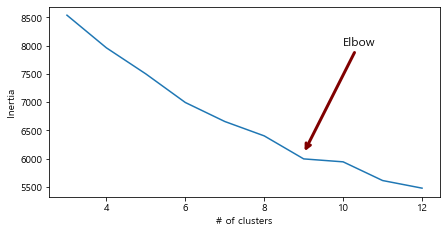

In [323]:
Y_list = []

for i in range(3, 13):
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    Y = km.fit(w_trans).inertia_          # 그래프의 Y값
    Y_list.append(Y)
    
# Inertia Chart - it changes every run
plt.figure(figsize=(7, 3.5))
pd.Series(Y_list, index=range(3, 13)).plot(kind="line")

plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow', xy=(9, 6100), xytext=(10, 8000), arrowprops=dict(arrowstyle='->', color='maroon', lw=3), fontsize=12)

> Inertia는 계속 변하는값이지만 대체적으로 8~10 사이에서 elbow가 형성됨. 따라서 cluster 개수는 9로 진행

In [335]:
km = KMeans(n_clusters=9, n_init=10, max_iter=300)     # n_init: 초기 임의의 centeroid 시도하는 횟수, max_iter: clustering 최대 반복 횟수
km.fit(w_trans)

KMeans(n_clusters=9)

In [336]:
# Add labels to dataframe
w['라벨'] = km.labels_
w.head()

,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),...,클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),라벨
0,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0.0,1.681440,...,0.002321,0.000000,0.001205,0.000000,0.009164,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,0.0,2.080971,...,0.000315,0.000000,0.000086,0.000000,0.001610,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,0.0,1.618421,...,0.002030,0.000207,0.000954,0.000062,0.009804,0.0,0.0,0.0,0.0,7
3,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,0.0,1.758860,...,0.005862,0.000372,0.002220,0.000000,0.024049,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,0.0,0.627183,...,0.000930,0.000000,0.002256,0.000077,0.012505,0.0,0.0,0.0,0.0,7


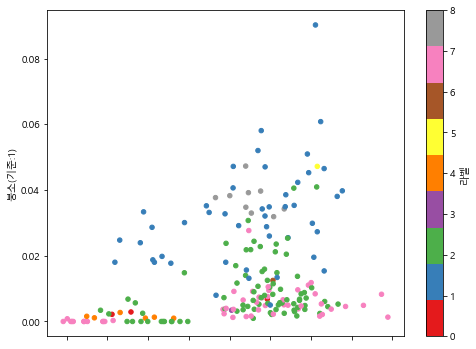

In [344]:
# 유해영향무기물질 2개 plotting
w.plot(kind="scatter", figsize=(8, 6), x='질산성질소(기준:10)', y='붕소(기준:1)', c='라벨', cmap='Set1')   
plt.show()

## 일부 컬럼만 사용한 경우 - 상관관계 계수를 이용

In [1386]:
# Combination 1 - score=0.6, f1=0.6(micro) -> score=0.5, f1=0.5(micro)
x = df[['질산성질소(기준:10)', '망간(기준:0.05)', '황산이온(기준:200)', '알루미늄(기준:0.2)', '총트리할로메탄(기준:0.1)', 
        '디브로모아세토니트릴(기준:0.1)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
y = df['스트레스인지정도']

# Combination 2 - score=0.57, f1=0.57(micro) -> 0.53, 0.53(micro)
# x = df[['알루미늄(기준:0.2)', '디브로모아세토니트릴(기준:0.1)', '디브로모클로로메탄(기준:0.1)']]
# y = df['스트레스인지정도']

# Combination 3 - score=0.52, f1=0.52(micro, macro) -> 0.52, 0.52(micro, macro)
# x = df[['알루미늄(기준:0.2)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
# y = df['우울감경험정도']

# Combination 4 - score=0.52, f1=0.52(micro) -> score=0.52, f1=0.52(micro)
# x = df[['알루미늄(기준:0.2)', '디브로모클로로메탄(기준:0.1)']]
# y = df['우울감경험정도']

In [1387]:
# Train & Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
x_train.shape, y_test.shape

((137, 8), (60,))

In [1388]:
# Standardisation
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [1389]:
x_scaled.mean(axis=0)              # 왜 정확히 0이 나오지 않지????????????????????????????

array([ 1.29661083e-17, -1.16694975e-16,  4.14915466e-16, -1.16694975e-16,
       -6.48305416e-17,  1.06970394e-16, -2.00974679e-16,  1.39385664e-16])

### Logistic Regression without Clustering

In [1390]:
logr = LogisticRegression()
logr.fit(x_scaled, y_train)

LogisticRegression()

In [1391]:
x_test_sc = scaler.transform(x_test)
logr.score(x_test_sc, y_test)

0.6

In [1346]:
# Classification report
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [1392]:
print(classification_report(y_test, logr.predict(x_test_sc)))

              precision    recall  f1-score   support

          낮음       0.60      0.23      0.33        13
          높음       0.53      0.57      0.55        14
          중간       0.62      0.76      0.68        33

    accuracy                           0.60        60
   macro avg       0.59      0.52      0.52        60
weighted avg       0.60      0.60      0.58        60



In [1393]:
# Confusion matrix
confusion_matrix(y_test, logr.predict(x_test_sc))

array([[ 3,  1,  9],
       [ 0,  8,  6],
       [ 2,  6, 25]], dtype=int64)

**각 카테고리의 f1을 전체 f1으로 만들기 위해 어떻게 평균값을 구할지는 f1_score()의 average 인수에 지정할 수 있다**
* `binary`: 타겟 항목이 binary인 경우
* `support`: 실제 각 카테고리에서 분류된 데이터의 개수 
* `micro average`: 전체 TP, FN, FP를 통해 전체에 대한 precision, recall, f1을 구한다 -> combination 1 기준 0.6
* `macro average`: 각 카테고리별로 precision, recall을 구한 뒤, 가중치 없이 평균을 내서 f1을 구한다(label imbalance 고려 안함)
* `weighted`: support를 가중치로 사용하여 f1을 구한다(label imbalance 고려)
* `samples`: multilabel 분류일 때 사용하는 방법. 각 데이터마다 f1을 구해서 평균을 구한다

In [1409]:
# f1 score의 평균
f1_score(y_test, logr.predict(x_test_sc), average='micro')

0.6

### K-means clustering as Preprocessing >> Logistic Regression

In [47]:
df.head(2)

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),카드뮴(기준:0.005),붕소(기준:1),페놀(기준:0.005),다이아지논(기준:0.02),파라티온(기준:0.06),"1,2-디브로모-3-클로로프로판(기준:0.003)",페니트로티온(기준:0.04),카바릴(기준:0.07),"1,1,1-트리클로로에탄(기준:0.1)",테트라클로로에틸렌(기준:0.01),트리클로로에틸렌(기준:0.03),디클로로메탄(기준:0.02),벤젠(기준:0.01),톨루엔(기준:0.7),에틸벤젠(기준:0.3),크실렌(기준:0.5),"1,1-디클로로에틸렌(기준:0.03)",사염화탄소(기준:0.002),경도(기준:300),과망간산칼륨소비량(기준:10),동(기준:1),색도(기준:5),세제(기준:0.5),수소이온농도(기준:5.8 ~ 8.5),아연(기준:3),염소이온(기준:250),증발잔류물(기준:500),철(기준:0.3),망간(기준:0.05),황산이온(기준:200),알루미늄(기준:0.2),총트리할로메탄(기준:0.1),잔류염소(기준:4),클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률,스트레스인지정도
0,2008,서울특별시,0.0,0.0,0.00000,0.0,0.0,0,0.0,0.0,0.0,1.681440,0.0,0.007404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.935260,1.264976,0.000068,0.0,0.0,7.175548,0.000414,14.865450,98.850068,0.0,0.000085,12.767918,0.029721,0.009816,0.617214,0.007183,0.002321,0.0,0.001205,0.0,0.009164,0.0,0.0,0.0,0.0,0.966,51.0,30.6,8.1,29.7,0.0,높음
1,2008,부산광역시,0.0,0.0,0.03331,0.0,0.0,0,0.0,0.0,0.0,2.080971,0.0,0.046553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.404043,0.994504,0.000000,1.0,0.0,6.786189,0.002017,31.699753,211.935882,0.0,0.000000,54.325788,0.000000,0.030889,0.703778,0.016176,0.000315,0.0,0.000086,0.0,0.001610,0.0,0.0,0.0,0.0,0.964,48.3,29.8,6.8,35.0,0.0,높음


#### Inertia로 최적의 cluster 개수 찾기

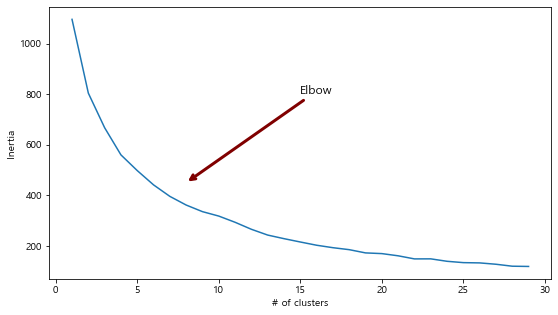

In [1129]:
Y_list = []

for i in range(1, 30):
    km = KMeans(n_clusters=i, n_init=10, max_iter=3000)
    Y = km.fit(x_scaled).inertia_          # 그래프의 Y값
    Y_list.append(Y)
    
# Inertia Chart - it changes every run
plt.figure(figsize=(9, 5))
pd.Series(Y_list, index=range(1, 30)).plot(kind="line")

plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow', xy=(8, 450), xytext=(15, 800), arrowprops=dict(arrowstyle='->', color='maroon', lw=3), fontsize=12)
plt.show()

In [1209]:
ppl = Pipeline([('km', KMeans(n_clusters=14, max_iter=10000000000)), ('logr', LogisticRegression(solver='saga'))])

In [1210]:
ppl.fit(x_scaled, y_train)

C:\Python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('km', KMeans(max_iter=10000000000, n_clusters=14)),
                ('logr', LogisticRegression(solver='saga'))])

In [1211]:
ppl.score(x_test_sc, y_test)

0.5166666666666667

In [1212]:
print(classification_report(y_test, ppl.predict(x_test_sc)))

              precision    recall  f1-score   support

          낮음       0.40      0.15      0.22        13
          높음       0.45      0.64      0.53        14
          중간       0.57      0.61      0.59        33

    accuracy                           0.52        60
   macro avg       0.47      0.47      0.45        60
weighted avg       0.51      0.52      0.50        60



#### Grid Search로 최적의 cluster 개수 찾기

In [1147]:
from sklearn.model_selection import GridSearchCV

In [1367]:
ppl = Pipeline([('km', KMeans(max_iter=10000000000)), ('logr', LogisticRegression(solver='saga'))])

In [1368]:
param_grid = dict(km__n_clusters=range(3, 16))  # km__n_clusters: pipeline 내 이름__parameter 구조!
grid = GridSearchCV(ppl, param_grid, cv=3)

In [1369]:
grid.fit(x_scaled, y_train)

C:\Python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was re

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('km', KMeans(max_iter=10000000000)),
                                       ('logr',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'km__n_clusters': range(3, 16)})

In [1370]:
grid.best_params_           # n_clusters 최적의 값: 14

{'km__n_clusters': 11}

In [1371]:
# Score 확인 - 둘다 결과 같음
grid.best_estimator_.score(x_test_sc, y_test)
grid.score(x_test_sc, y_test)

0.5166666666666667

In [1372]:
print(classification_report(y_test, grid.predict(x_test_sc)))

              precision    recall  f1-score   support

          낮음       0.58      0.44      0.50        25
          높음       0.57      0.50      0.53         8
          중간       0.47      0.59      0.52        27

    accuracy                           0.52        60
   macro avg       0.54      0.51      0.52        60
weighted avg       0.53      0.52      0.52        60



In [1375]:
# f1 score 평균
f1_score(y_test, grid.predict(x_test_sc), average='micro')

0.5166666666666667

### 가장 좋은 결과 visualisation
스트레스 인지 정도와 8가지 수질 항목의 Logistic Regession only 결과를 시각화

#### Confusion Matrix Plotting

In [1385]:
from sklearn.metrics import plot_confusion_matrix

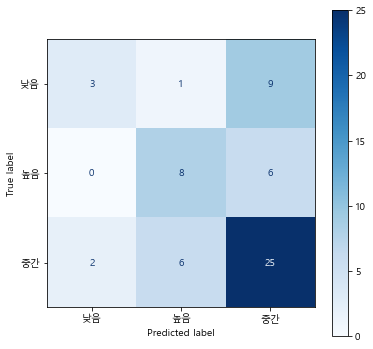

In [1434]:
# Logistic
fig, ax = plt.subplots(figsize=(6, 6))    # figure와 axes를 동시에 만듦
plot_confusion_matrix(logr, x_test_sc, y_test, cmap='Blues', ax=ax)
plt.show()

#### 예측한 분류 결과를 scatter plot
상관계수가 가장 큰 두 항목을 축으로 함

In [1448]:
# x_test_sc와 y_pred array를 dataframe으로 만들기
x_df = pd.DataFrame(x_test_sc, columns=['질산성질소(기준:10)', '망간(기준:0.05)', '황산이온(기준:200)', '알루미늄(기준:0.2)', 
                                        '총트리할로메탄(기준:0.1)', '디브로모아세토니트릴(기준:0.1)', '브로모디클로로메탄(기준:0.03)', 
                                        '디브로모클로로메탄(기준:0.1)'])
y_sr = pd.Series(logr.predict(x_test_sc), name='스트레스인지정도_예측값')
scatter_df = pd.concat([x_df, y_sr], axis=1)
scatter_df['스트레스인지정도_예측값'].replace({'낮음':0, '중간':1, '높음':2}, inplace=True)   # 카테고리 숫자로 변경

C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


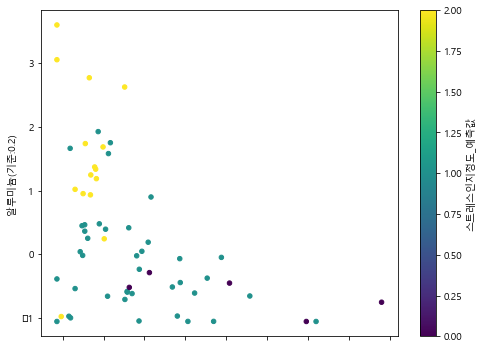

In [1449]:
# Plotting
scatter_df.plot(kind='scatter', figsize=(8, 6), x='디브로모클로로메탄(기준:0.1)', y='알루미늄(기준:0.2)', 
                c='스트레스인지정도_예측값', cmap='viridis')
plt.xlabel('디브로모클로로메탄(기준:0.1)', labelpad=10)
plt.show()

# Correlation between Aluminum & Cognitive Disorder
실제 연관성이 있는 알루미늄의 수중 농도와 인지장애 경험률에 연관성이 있는지 확인
* 데이터가 2018~2019년 밖에 없어서 데이터셋의 크기가 작은 한계점

## Preprocessing

In [541]:
# 2018년 건강지표 데이터
h_idx = ['시도', '삶의질지수(EQ5D)_조율', '양호한주관적건강수준인지율_표준화율', '스트레스인지율_표준화율', '우울감경험률_표준화율', 
         '인지장애경험률(50세이상)_표준화율', '주관적구강건강이나쁜인구의분율_표준화율', '연간보건기관이용률_표준화율']
h_18 = pd.read_excel('../data/rawdata/health/health_2008_2018.xlsx', sheet_name=14, usecols=h_idx, nrows=18)

# 컬럼명 통일
h_18.columns = ['지역', '삶의질지수', '양호한주관적건강수준인지율', '스트레스인지율', '우울감경험률', 
                '인지장애경험률(50세이상)', '주관적구강건강이나쁜인구의분율', '연간보건기관이용률']
h_18['연도'] = 2018

In [542]:
# 2019년 건강지표 데이터 - 다른 연도랑 컬럼표기가 특히 다름!
h_idx = ['시도', '삶의 질 지수(EQ-5D)_표준화율', '양호한 주관적 건강수준 인지율_표준화율', '스트레스 인지율_표준화율', '우울감 경험률_표준화율', 
         '인지장애 경험률(50세 이상)_표준화율', '주관적 구강건강이 나쁜 인구의 분율_표준화율', '연간 보건기관 이용률_조율']
h_19 = pd.read_excel('../data/rawdata/health/health_2008_2018.xlsx', sheet_name=15, usecols=h_idx, nrows=18)

h_19.columns = ['지역', '삶의질지수', '양호한주관적건강수준인지율', '스트레스인지율', '우울감경험률', 
                '인지장애경험률(50세이상)', '주관적구강건강이나쁜인구의분율', '연간보건기관이용률']
h_19['연도'] = 2019

In [548]:
df = pd.concat([h_18, h_19], axis=0, ignore_index=True)
h = df[~(df['지역'].isin(['세종특별자치시', '전국']))]         # 수질 데이터에 맞추어 세종시 제외
h.index = range(32)
h.head()

,지역,삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,인지장애경험률(50세이상),주관적구강건강이나쁜인구의분율,연간보건기관이용률,연도
0,서울특별시,0.954,45.8,27.7,4.9,22.3,22.2,18.6,2018
1,부산광역시,0.950,40.4,24.4,6.0,23.7,29.0,21.1,2018
2,대구광역시,0.960,40.5,23.3,3.4,16.8,25.0,16.4,2018
3,인천광역시,0.945,36.5,31.7,8.1,26.5,30.4,20.1,2018
4,광주광역시,0.959,40.9,26.4,4.5,30.5,25.4,20.3,2018


In [552]:
new_wh = pd.merge(left=water, right=h, on=['지역', '연도'], how='inner')
new_wh.head(2)

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),카드뮴(기준:0.005),붕소(기준:1),페놀(기준:0.005),다이아지논(기준:0.02),파라티온(기준:0.06),"1,2-디브로모-3-클로로프로판(기준:0.003)",페니트로티온(기준:0.04),카바릴(기준:0.07),"1,1,1-트리클로로에탄(기준:0.1)",테트라클로로에틸렌(기준:0.01),트리클로로에틸렌(기준:0.03),디클로로메탄(기준:0.02),벤젠(기준:0.01),톨루엔(기준:0.7),에틸벤젠(기준:0.3),크실렌(기준:0.5),"1,1-디클로로에틸렌(기준:0.03)",사염화탄소(기준:0.002),경도(기준:300),과망간산칼륨소비량(기준:10),동(기준:1),색도(기준:5),세제(기준:0.5),수소이온농도(기준:5.8 ~ 8.5),아연(기준:3),염소이온(기준:250),증발잔류물(기준:500),철(기준:0.3),망간(기준:0.05),황산이온(기준:200),알루미늄(기준:0.2),총트리할로메탄(기준:0.1),잔류염소(기준:4),클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,인지장애경험률(50세이상),주관적구강건강이나쁜인구의분율,연간보건기관이용률
0,2018,서울특별시,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,2.001352,0.0,0.011836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000048,0.0,0.0,0.0,0.0,0.0,0.0,62.901285,1.015382,0.000849,0.0,0.0,7.080097,0.003044,22.105477,119.068627,0.0,0.0,13.146214,0.011133,0.020718,0.466154,0.014005,0.000482,0.000000,0.000161,0.000000e+00,0.003264,0.005420,0.001245,0.000000,0.0,0.954,45.8,27.7,4.9,22.3,22.2,18.6
1,2018,부산광역시,0.0,0.0,0.023915,0.0,0.0,0,0.0,0.0,0.0,1.919079,0.0,0.042359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,88.890419,1.723975,0.000000,0.0,0.0,6.968064,0.004095,33.448007,223.120227,0.0,0.0,46.890419,0.000000,0.026581,0.688803,0.015177,0.000509,0.000328,0.000001,2.463488e-07,0.001614,0.007573,0.003311,0.000299,0.0,0.950,40.4,24.4,6.0,23.7,29.0,21.1


## Linear Regression

In [553]:
x = new_wh['알루미늄(기준:0.2)']
y = new_wh['인지장애경험률(50세이상)']

In [554]:
stats.pearsonr(x, y)

(0.017128931275007114, 0.9258658792466335)

In [564]:
abs(new_wh.corr()['인지장애경험률(50세이상)']).sort_values(ascending=False)

인지장애경험률(50세이상)     1.000000
주관적구강건강이나쁜인구의분율    0.471273
양호한주관적건강수준인지율      0.461016
에틸벤젠(기준:0.3)       0.422971
삶의질지수              0.416735
                     ...   
일반세균(기준:100)       0.001169
수은(기준:0.001)            NaN
페놀(기준:0.005)            NaN
파라티온(기준:0.06)           NaN
페니트로티온(기준:0.04)         NaN
Name: 인지장애경험률(50세이상), Length: 61, dtype: float64

In [566]:
new_wh.corr()

,연도,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),카드뮴(기준:0.005),붕소(기준:1),페놀(기준:0.005),다이아지논(기준:0.02),파라티온(기준:0.06),"1,2-디브로모-3-클로로프로판(기준:0.003)",페니트로티온(기준:0.04),카바릴(기준:0.07),"1,1,1-트리클로로에탄(기준:0.1)",테트라클로로에틸렌(기준:0.01),트리클로로에틸렌(기준:0.03),디클로로메탄(기준:0.02),벤젠(기준:0.01),톨루엔(기준:0.7),에틸벤젠(기준:0.3),크실렌(기준:0.5),"1,1-디클로로에틸렌(기준:0.03)",사염화탄소(기준:0.002),경도(기준:300),과망간산칼륨소비량(기준:10),동(기준:1),색도(기준:5),세제(기준:0.5),수소이온농도(기준:5.8 ~ 8.5),아연(기준:3),염소이온(기준:250),증발잔류물(기준:500),철(기준:0.3),망간(기준:0.05),황산이온(기준:200),알루미늄(기준:0.2),총트리할로메탄(기준:0.1),잔류염소(기준:4),클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,인지장애경험률(50세이상),주관적구강건강이나쁜인구의분율,연간보건기관이용률
연도,1.000000,-0.170489,0.077051,-0.150251,-0.050678,-0.254032,NaN,-0.179605,0.179605,-0.190519,-0.210353,-0.079829,-0.054760,NaN,-0.179605,NaN,-0.220851,NaN,0.119538,-0.161530,-0.126938,-0.105403,-0.250795,-0.240219,-0.170799,-0.201161,0.041142,-0.164983,-0.365025,-0.051631,0.127785,0.016642,-0.018204,-0.101464,0.039530,-0.060441,-0.075386,-0.062983,-0.077749,-0.128732,-0.045948,0.075307,-0.116965,0.024510,-0.090404,-0.079975,0.044664,0.155117,-0.173875,-0.011361,-0.003870,-0.171139,-0.022873,-0.204745,0.441606,0.012232,-0.203983,0.091072,-0.218969,-0.249281,0.277901
일반세균(기준:100),-0.170489,1.000000,0.271241,0.244399,-0.072322,0.465119,NaN,-0.088975,0.224984,0.675382,-0.227484,-0.060272,0.053486,NaN,0.764681,NaN,0.295941,NaN,0.154792,-0.061220,-0.028509,-0.033925,0.621864,-0.072871,0.198345,0.002480,-0.056748,0.083721,-0.119395,-0.193388,0.111718,0.452560,0.129173,0.770216,-0.177523,0.513592,-0.248822,-0.161052,0.232146,0.742112,-0.168865,0.113215,0.062638,0.115975,0.090919,0.319161,-0.015383,0.050909,0.412670,-0.022070,0.033918,-0.068615,0.075066,0.319175,-0.420893,-0.112429,-0.152308,-0.012476,0.001169,0.489485,0.520073
납(기준:0.01),0.077051,0.271241,1.000000,0.095148,0.105469,0.005168,NaN,0.398489,0.794341,0.051780,0.062564,-0.090904,0.001543,NaN,0.063025,NaN,0.302869,NaN,-0.043334,-0.040304,-0.071258,-0.099563,-0.011159,0.237892,-0.087231,-0.077067,0.114381,-0.005797,0.130595,0.095906,0.240400,0.305232,0.096877,0.094753,0.095382,0.212176,-0.142460,0.053849,0.015271,0.123933,-0.021958,0.230996,0.112908,0.174183,0.170188,0.392112,-0.028131,-0.034305,0.203198,0.166795,0.026933,-0.127565,-0.146113,0.196390,0.010725,-0.248674,0.023001,0.273916,-0.001991,0.066544,0.057566
불소(기준:1.5),-0.150251,0.244399,0.095148,1.000000,0.144135,0.345925,NaN,0.020865,0.182819,0.086180,0.243532,0.138841,0.633342,NaN,-0.002737,NaN,-0.002972,NaN,0.067896,0.106019,0.188807,-0.036595,0.096797,0.173838,0.209139,0.376907,0.251898,0.120785,0.077242,0.414026,0.363876,0.314790,-0.167030,0.031464,-0.048528,0.316898,0.388579,0.411327,-0.044709,0.029463,0.343851,-0.195961,0.118746,-0.065496,0.006362,0.076233,0.034104,-0.188929,-0.009534,0.070787,0.083594,0.245549,0.021132,-0.119333,-0.185821,-0.327902,-0.386028,-0.186526,0.106413,0.355289,0.198939
비소(기준:0.01),-0.050678,-0.072322,0.105469,0.144135,1.000000,-0.061824,NaN,0.214009,-0.047943,-0.004018,0.204438,-0.093279,-0.098640,NaN,0.008303,NaN,-0.087950,NaN,0.528959,-0.053761,0.684162,0.002628,0.193933,0.644513,0.160510,0.865153,0.806217,-0.071987,0.575657,0.270051,0.224009,0.086791,0.040415,0.019822,0.100711,0.200987,0.279120,0.144941,0.058136,0.018623,0.055661,-0.003055,0.326045,0.086255,0.224882,0.027253,0.133304,-0.041217,0.155375,0.334021,0.311047,0.220477,0.089772,-0.055705,-0.438884,-0.134434,0.294878,0.269961,0.351682,0.115047,0.195776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
스트레스인지율,-0.203983,-0.152308,0.023001,-0.386028,0.294878,-0.123625,NaN,0.185896

> 연관성 없음

# Correlation between Fine Dust & COPD
관련 컬럼: '이산화황대기오염도변화추이', '이산화질소대기오염도변화추이', '일산화탄소대기오염도변화추이', '미세먼지PM10대기오염도변화추이', '미세먼지PM25대기오염도변화추이', '예방가능입원율_COPD'

In [621]:
h_18 = pd.read_excel('../data/rawdata/health/health_2008_2018.xlsx', sheet_name=14)
h_18.head(20)

,번호,코드,시도,시군구,지역,CHS_No,총사망_사망자수_전체,총사망률_전체,총사망률_표준화사망률_전체,총사망_사망자수_남자,총사망률_남자,총사망률_표준화사망률_남자,총사망_사망자수_여자,총사망률_여자,총사망률_표준화사망률_여자,특정감염성및기생충성질환_사망자수_전체,특정감염성및기생충성질환_사망률_전체,특정감염성및기생충성질환_표준화사망률_전체,특정감염성및기생충성질환_사망자수_남자,특정감염성및기생충성질환_사망률_남자,특정감염성및기생충성질환_표준화사망률_남자,특정감염성및기생충성질환_사망자수_여자,특정감염성및기생충성질환_사망률_여자,특정감염성및기생충성질환_표준화사망률_여자,호흡기결핵_사망자수_전체,호흡기결핵_사망률_전체,호흡기결핵_표준화사망률_전체,호흡기결핵_사망자수_남자,호흡기결핵_사망률_남자,호흡기결핵_표준화사망률_남자,호흡기결핵_사망자수_여자,호흡기결핵_사망률_여자,호흡기결핵_표준화사망률_여자,패혈증_사망자수_전체,패혈증_사망률_전체,...,대사증후군위험요인_3개_여자,대사증후군위험요인_4개_여자,대사증후군위험요인_5개_여자,고혈압진단경험자의치료율_조율,고혈압진단경험자의치료율_표준화율,고혈압진단경험자의치료율_30세이상_조율,고혈압진단경험자의치료율_30세이상_표준화율,당뇨병진단경험자의치료율_조율,당뇨병진단경험자의치료율_표준화율,당뇨병진단경험자의치료율_30세이상_조율,당뇨병진단경험자의치료율_30세이상_표준화율,연간당뇨병안질환합병증검사수진율_30세이상_조율,연간당뇨병안질환합병증검사수진율_30세이상_표준화율,연간당뇨병신장질환합병증검사수진율_30세이상_조율,연간당뇨병신장질환합병증검사수진율_30세이상_표준화율,연간필요의료서비스미치료율_조율,연간필요의료서비스미치료율_표준화율,필요의료서비스미치료자의경제적이유로인한미치료율_조율,필요의료서비스미치료자의경제적이유로인한미치료율_표준화율,기준시간내접근불가비율_상급종합병원,기준시간내접근불가비율_권역응급의료센터,기준시간내접근불가비율_NICU(신생아집중치료실),기준시간내접근불가비율_종합병원(전체),기준시간내접근불가비율_지역응급의료센터,기준시간내접근불가비율_ICU(중환자실),기준시간내접근불가비율_응급실,기준시간내접근불가비율_분만실,기준시간내의료이용률_상급종합병원,기준시간내의료이용률_권역응급의료센터,기준시간내의료이용률_NICU(신생아집중치료실),기준시간내의료이용률_종합병원(전체),기준시간내의료이용률_지역응급의료센터,기준시간내의료이용률_ICU(중환자실),기준시간내의료이용률_응급실,기준시간내의료이용률_분만실
0,1,0,전국,전국,전국,,298820.0,582.5,322.6,161187.0,629.6,441.6,137633.0,535.6,227.3,8746.0,17.0,8.8,4209.0,16.4,11.3,4537.0,17.7,6.8,1658.0,3.2,1.6,1042.0,4.1,2.8,616.0,2.4,0.8,4665.0,9.1,...,341237.0,210812.0,82736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,11,서울특별시,서울특별시,서울특별시,A,45219.0,468.9,283.3,25384.0,538.1,384.5,19835.0,402.7,200.2,1264.0,13.1,7.7,675.0,14.3,10.2,589.0,12.0,5.5,319.0,3.3,1.9,220.0,4.7,3.3,99.0,2.0,0.9,536.0,5.6,...,59370.0,37646.0,15237.0,92.4,91.1,93.2,92.0,89.6,88.7,89.9,89.1,47.3,47.1,57.1,56.8,7.3,7.6,1.4,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.9,95.7,97.6,95.4,82.4,93.0,82.6,93.1
2,3,21,부산광역시,부산광역시,부산광역시,B,22570.0,660.3,350.8,12349.0,734.2,477.6,10221.0,588.7,248.3,622.0,18.2,9.1,324.0,19.3,12.5,298.0,17.2,6.6,110.0,3.2,1.6,84.0,5.0,3.2,26.0,1.5,0.5,362.0,10.6,...,22752.0,13267.0,4561.0,94.0,92.9,94.4,93.6,94.6,93.8,94.6,93.7,43.6,44.0,47.9,48.2,8.9,9.5,1.3,1.1,0.0,0.0,0.0,0.0,1.8,0.0,0.1,0.0,86.9,82.6,93.2,94.2,66.4,88.2,67.8,93.3
3,4,22,대구광역시,대구광역시,대구광역시,C,14070.0,574.4,332.7,7631.0,629.0,457.2,6439.0,520.8,237.2,426.0,17.4,9.5,196.0,16.2,11.6,230.0,18.6,8.0,97.0,4.0,2.1,54.0,4.5,3.1,43.0,3.5,1.3,171.0,7.0,...,14923.0,8816.0,3026.0,93.5,92.4,93.8,93.2,92.4,91.7,92.4,92.3,38.6,40.4,44.0,43.9,5.8,6.4,0.8,0.7,0.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,88.6,0.0,94.4,86.9,78.3,82.4,82.2,94.0
4,5,23,인천광역시,인천광역시,인천광역시,D,15316.0,524.0,339.4,8400.0,573.6,464.6,6916.0,474.2,239.5,408.0,14.0,8.6,193.0,13.2,10.9,215.0,14.7,6.9,77.0,2.6,1.6,46.0,3.1,2.6,31.0,2.1,0.9,225.0,7.7,...,19098.0,12025.0,5173.0,91.1,90.8,91.7,91.6,91.8,90.9,92.1,91.4,41.3,41.0,52.0,51.6,11.0,11.6,1.4,1.2,0.4,1.2,1.0,0.5,3.7,1.0,1.7,0.7,98.4,84.5,86.0,93.1,76.2,85.9,82.6,91.9
5,6,24,광주광역시,광주광역시,광주광역시,E,7781.0,535.7,338.0,4001.0,556.3,448.4,3780.0,515.5,252.3,242.0,16.7,9.6,102.0,14.2,11.1,140.0,19.1,8.4,30.0,2.1,1.2,20.0,2.8,2.1,10.0,1.4,0.6,157.0,10.8,...,9425.0,5488.0,1809.0,93.5,92.8,94.2,93.4,94.6,93.8,94.6,94.4,42.1,43.5,44.5,45.4,8.5,8.8,1.1,1.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,82.9,80.0,95.7,92.4,61.0,82.3,79.9,94.6
6,7,25,대전광역시,대전광역시,대전광역시,F,7403.0,498.4,316.2,3976.0,536.2,423.7,3427.0,460.7,228.3,178.0,12.0,7.2,91.0,12.3,9.6,87.0,11.7,5.4,39.0,2.6,1.6,26.0,3.5,2.6,13.0,1.7,0.9,77.0,5.2,...,10107.0,6368.0,2584.0,92.3,92.2,93.5,92.9,93.1,91.7,93.1,92.7,39.5,39.5,47.6,48.3,8.1,8.4,1.3,1.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,70.3,92.8,94.1,92.5,68.2,83.1,84.6,91.3
7,8,26,울산광역시,울산광역시,울산광역시,G,5349.0,463.4,355.3,2901.0,489.1,478.5,2448.0,436.3,260.5,113.0,9.8,7.5,54.0,9.1,10.3,59.0,10.5,6.1,23.0,2.0,1.6,11.0,1.9,1.9,12.0,2.1,1.3,57.0,4.9,...,6028.0,3177.0,1112.0,92.1,91.5,92.4,91.8,90.7,90.3,90.7,90.2,38.9,38.6,45.7,45.3,7.0,7.5,0.9,0.9,0.0,0.2,0.2,0.0,2.4,0.0,0.2,0.1,38.6,9.3,64.5

In [628]:
h_18 = h_18.loc[18:]   # 시도 전체 합산 한것은 제외한다

In [666]:
df = h_18[[ '이산화황대기오염도변화추이', '이산화질소대기오염도변화추이', '일산화탄소대기오염도변화추이', '미세먼지PM10대기오염도변화추이', '미세먼지PM25대기오염도변화추이', '예방가능입원율_COPD']]
df.dropna(axis=0, inplace=True)
df.head(20)

<ipython-input-666-5133c0cb8331>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


,이산화황대기오염도변화추이,이산화질소대기오염도변화추이,일산화탄소대기오염도변화추이,미세먼지PM10대기오염도변화추이,미세먼지PM25대기오염도변화추이,예방가능입원율_COPD
91,0.00540,0.01800,0.500000,39.400000,23.333333,18.4
101,0.00300,0.01850,0.450000,45.500000,24.000000,9.7
105,0.00400,0.02725,0.500000,48.500000,26.750000,10.4
109,0.00400,0.03150,0.500000,45.500000,25.500000,6.1
110,0.00400,0.02375,0.500000,55.250000,30.750000,12.3
113,0.00400,0.01600,0.400000,43.000000,24.000000,11.6
121,0.00300,0.02750,0.600000,41.000000,23.000000,4.0
122,0.00400,0.02550,0.400000,43.000000,24.500000,10.6
123,0.00300,0.02025,0.450000,38.250000,21.750000,10.7
124,0.00400,0.02800,0.500000,47.000000,28.000000,14.2


In [667]:
x = df[[ '이산화황대기오염도변화추이', '이산화질소대기오염도변화추이', '일산화탄소대기오염도변화추이', '미세먼지PM10대기오염도변화추이', '미세먼지PM25대기오염도변화추이']]
y = df['예방가능입원율_COPD']

In [668]:
# Train & Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
x_train.shape, y_test.shape

((67, 5), (29,))

In [669]:
# Pipeline
ppl = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
ppl.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [670]:
ppl.score(x_test, y_test)

-0.12895819638420303

In [634]:
# Pipeline 결과가 실제 따로따로 계산한 값과 같은지 궁금해서 확인
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
lr = LinearRegression()
lr.fit(x_scaled, y_train)

x_test_scaled = scaler.transform(x_test)
lr.score(x_test_scaled, y_test)    # pipeline과 결과 같음

-0.07581951818064492

> 관련 컬럼 다 넣으면 score = -0.13, 미세먼지 컬럼만 넣으면 score = -0.076